In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pickle
import os
import sys

CURR_DIR = os.path.dirname(os.path.realpath("__file__"))
ROOT_DIR = os.path.abspath(os.path.join(CURR_DIR))
LIB_DIR = os.path.join(ROOT_DIR, 'libs')
EXP_DIR = os.path.join(CURR_DIR, "doublependulum_exp")
sys.path.append(LIB_DIR)

In [2]:
CURR_DIR = os.path.dirname(os.path.realpath("__file__"))
EXP_DIR = os.path.join(CURR_DIR, "doublependulum_exp")
data_dirs = os.listdir(EXP_DIR)
exp_name_uniques = []
for data_dir in data_dirs:
    if data_dir.split("_")[0] not in exp_name_uniques:
        if ".png" not in data_dir:
            exp_name_uniques.append(data_dir.split("_")[0])

exp_name_uniques = sorted(exp_name_uniques)
print(exp_name_uniques)

['elits', 'elits100100', 'elits100400', 'elits200200', 'elits50200', 'elitsnoth', 'elitsupdateelit', 'elitsupdateelit100100', 'elitsupdateelit10050', 'hybsmre01', 'hybsmre01elitts32', 'hybsmre01elitts32v2', 'hybsmre01ts32', 'hybsmre01ts32ch', 'hybsmre01ts32ctp', 'hybsmre01ts32ep0507', 'hybsmre01ts32step', 'hybsmre01ts32stepnocycle', 'hybsmre01ts32ts32', 'hybsmre01ts32v2', 'hybsmrerandommutate', 'kanneat', 'kanneatnocrossover', 'nocrossover', 'normal', 'normalep07', 'nts32', 'nts32ep07', 'smr001', 'smr01', 'smre01', 'smre01ep07', 'smre01hyb']


In [3]:
def get_name_have_novelty(names):
    name_have_novelty = []
    for name in names:
        df_history_pop = pd.read_csv(os.path.join(EXP_DIR, name+"_0", "history_pop.csv"))
        col_names = df_history_pop.columns
        if "novelty" in col_names:
            name_have_novelty.append(name)
    return name_have_novelty

exp_name_uniques = get_name_have_novelty(exp_name_uniques)
print(exp_name_uniques)

['elits', 'elits100100', 'elits100400', 'elits200200', 'elits50200', 'elitsnoth', 'elitsupdateelit', 'elitsupdateelit100100', 'elitsupdateelit10050']


In [4]:
def get_mean_std(df_hist_archive: pd.DataFrame, col_name="novelty") -> tuple:
    """各世代の新規性アーカイブの平均新規性、標準偏差を返す

    Args:
        df_hist_archive (pd.DataFrame): 各世代の新規性アーカイブ

    Returns:
        tuple: 各世代の平均適応度、標準偏差のリスト
    """
    hist_avg_fit = df_hist_archive.groupby("generation").mean()[col_name].values
    hist_std_fit = df_hist_archive.groupby("generation").std()[col_name].values

    return (hist_avg_fit, hist_std_fit)

def get_max_min(df_hist_archive: pd.DataFrame, col_name="novelty") -> tuple:
    """各世代の新規性アーカイブの最大新規性、最小新規性を返す

    Args:
        df_hist_archive (pd.DataFrame): 各世代の新規性アーカイブ

    Returns:
        tuple: 各世代の最大新規性、最小新規性のリスト
    """
    hist_max_fit = df_hist_archive.groupby("generation").max()[col_name].values
    hist_min_fit = df_hist_archive.groupby("generation").min()[col_name].values

    return (hist_max_fit, hist_min_fit)


def get_global_bests(hist_fit: list) -> list:
    """globalベストのリストを返す

    Args:
        hist_fit (list): 各世代の最良適応度のリスト

    Returns:
        list: globalベストのリスト
    """
    global_bests = [hist_fit[0]]
    for i in range(1, len(hist_fit)):
        if hist_fit[i] > global_bests[-1]:
            global_bests.append(hist_fit[i])
        else:
            global_bests.append(global_bests[-1])

    return global_bests

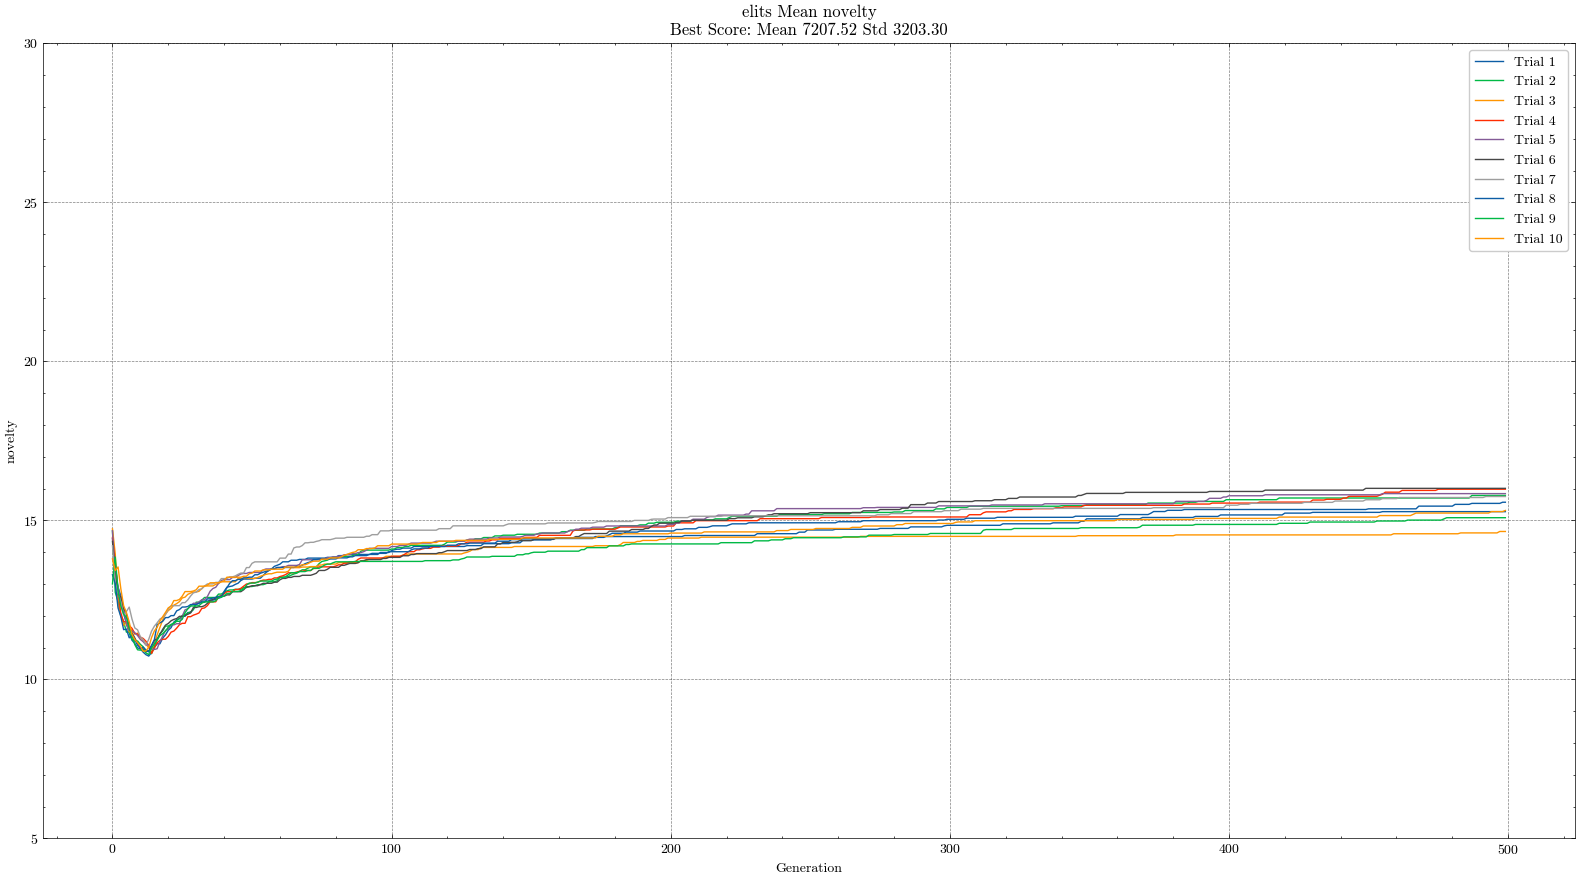

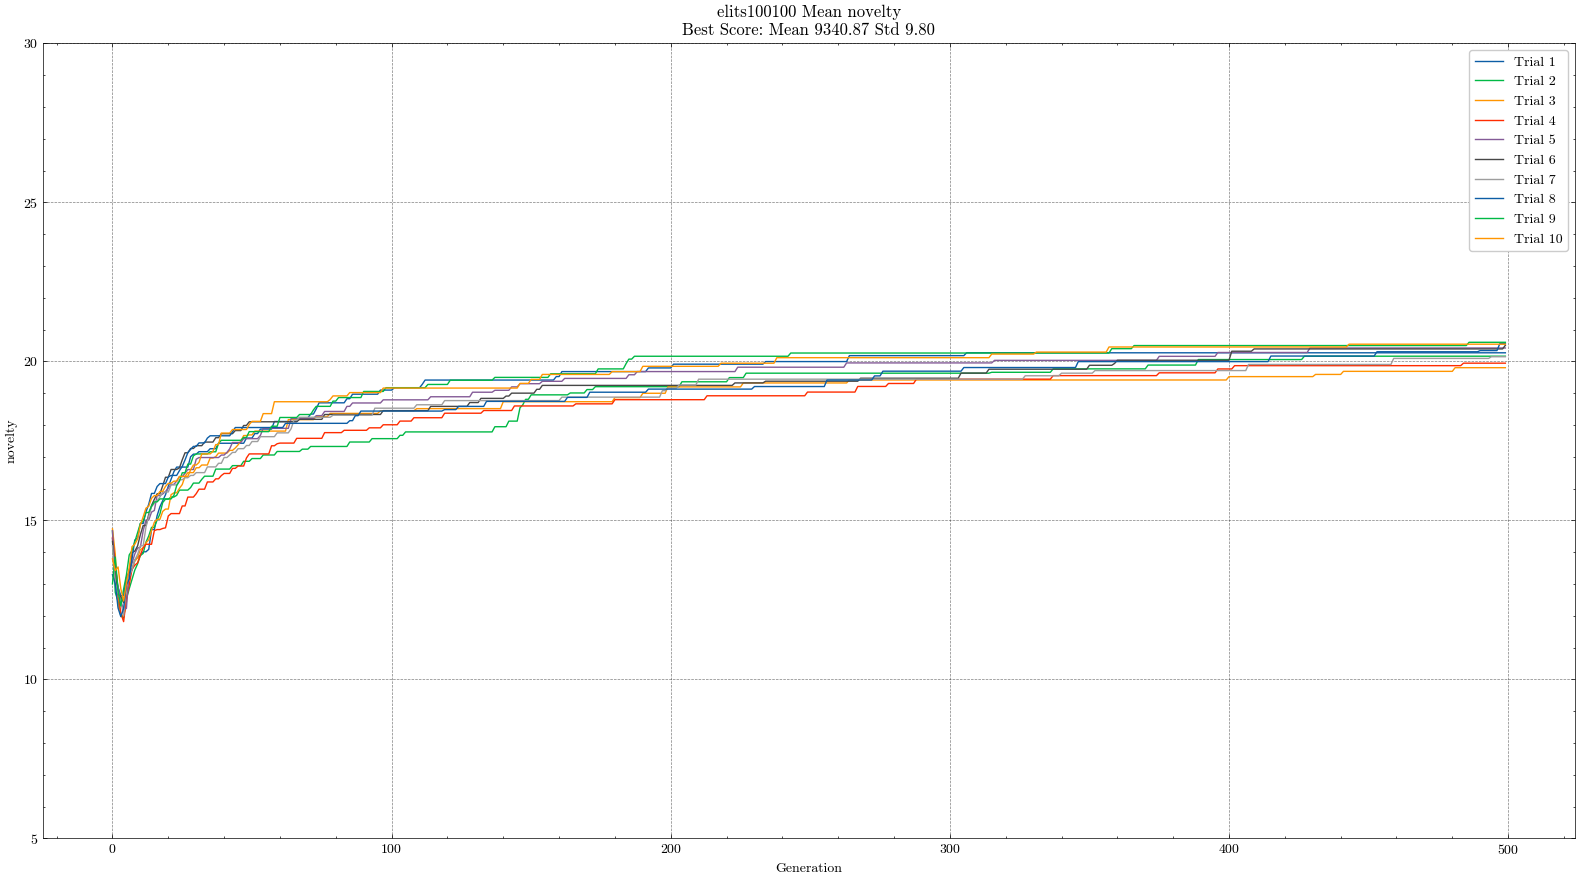

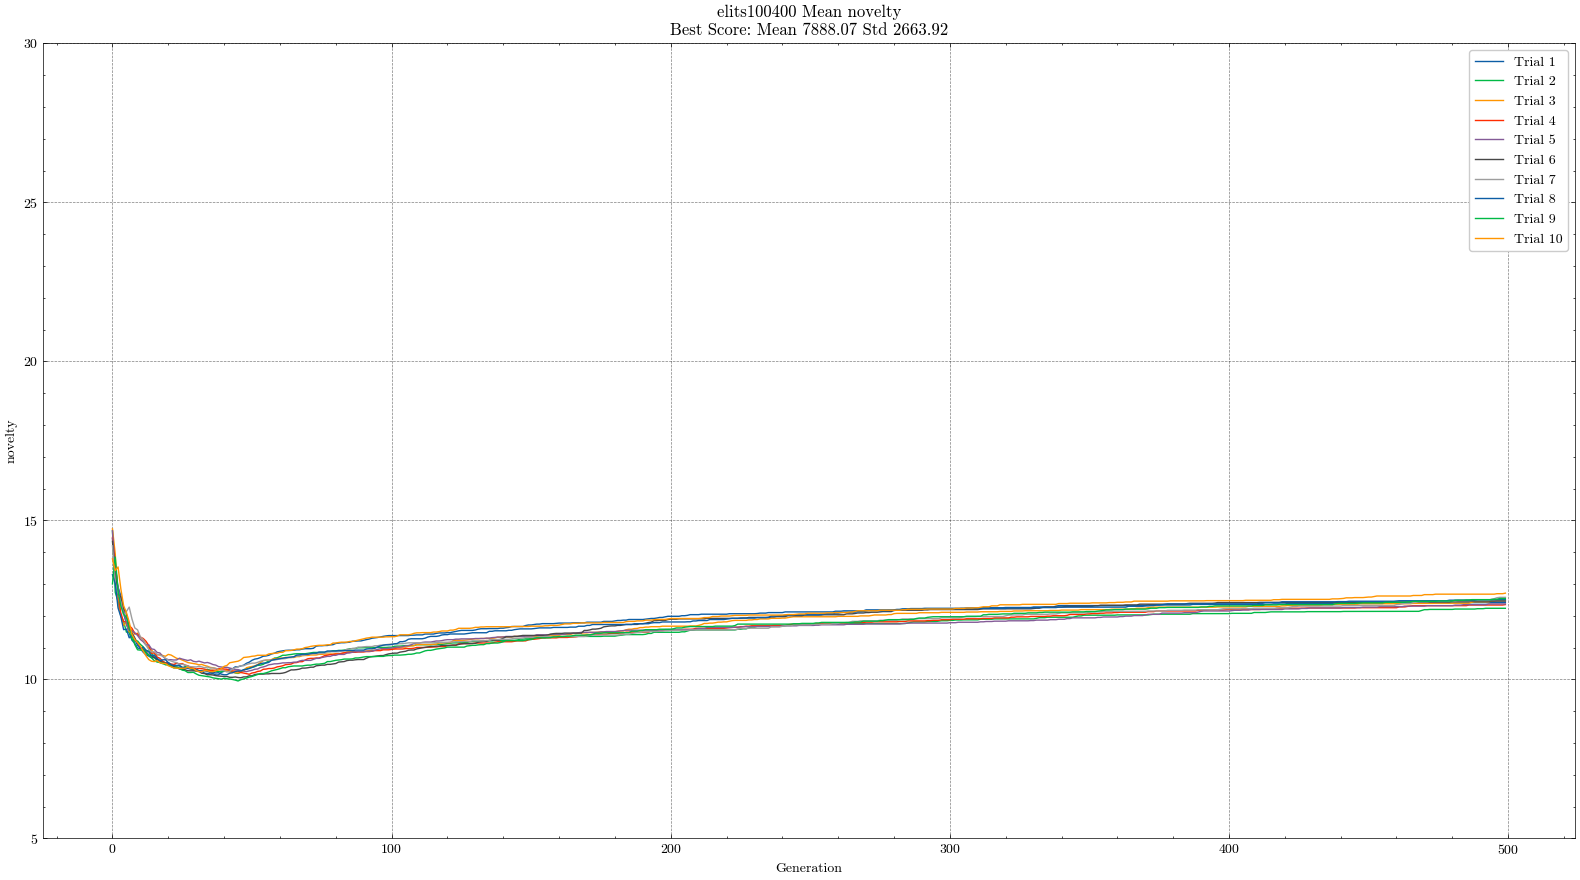

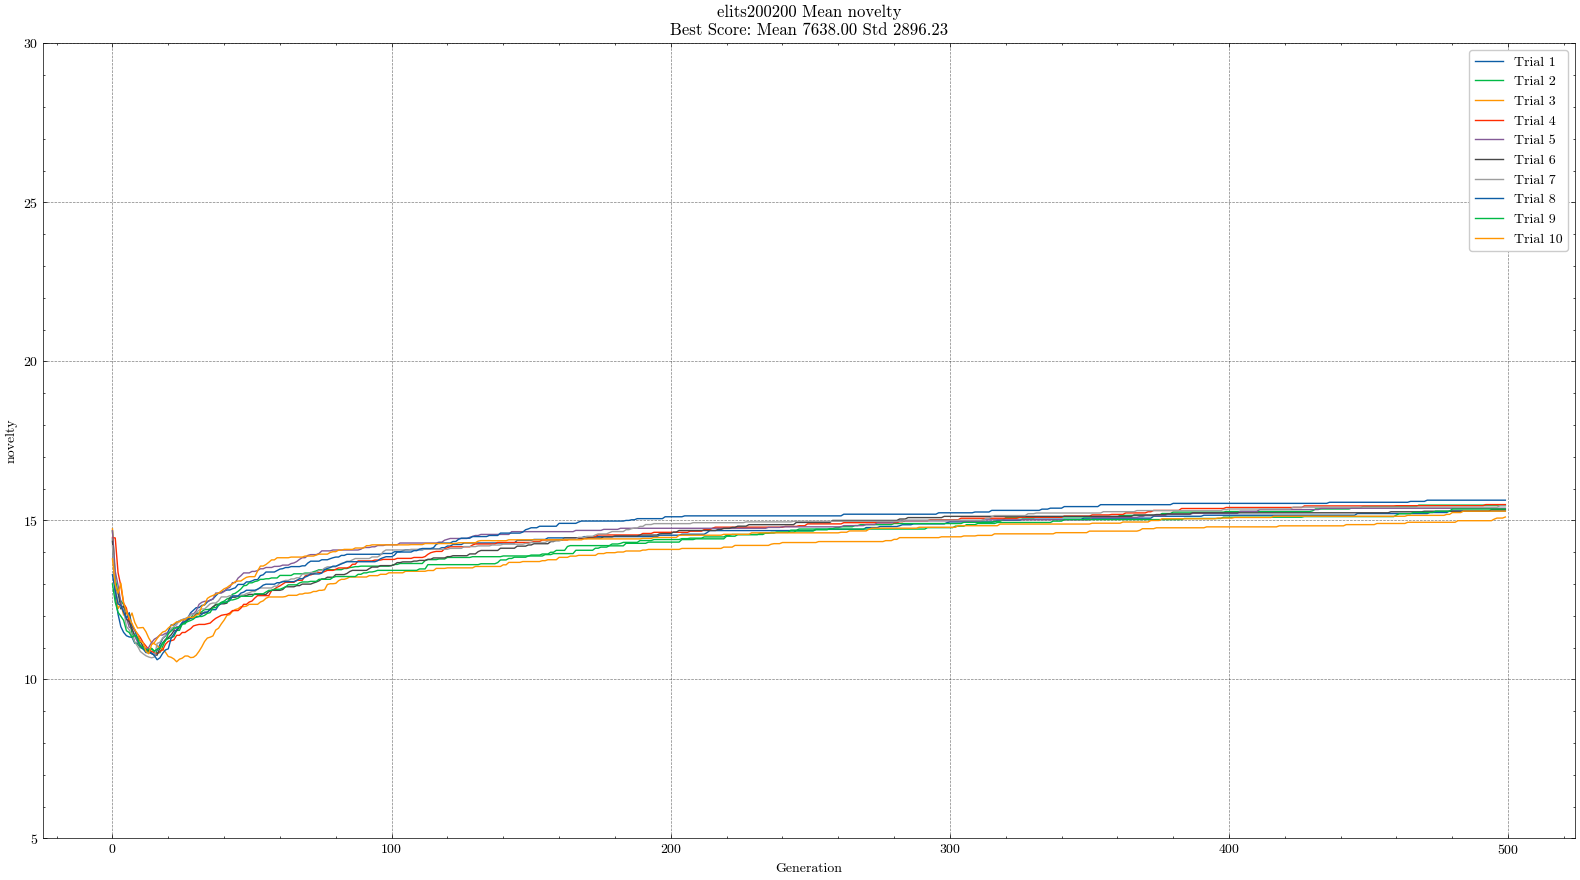

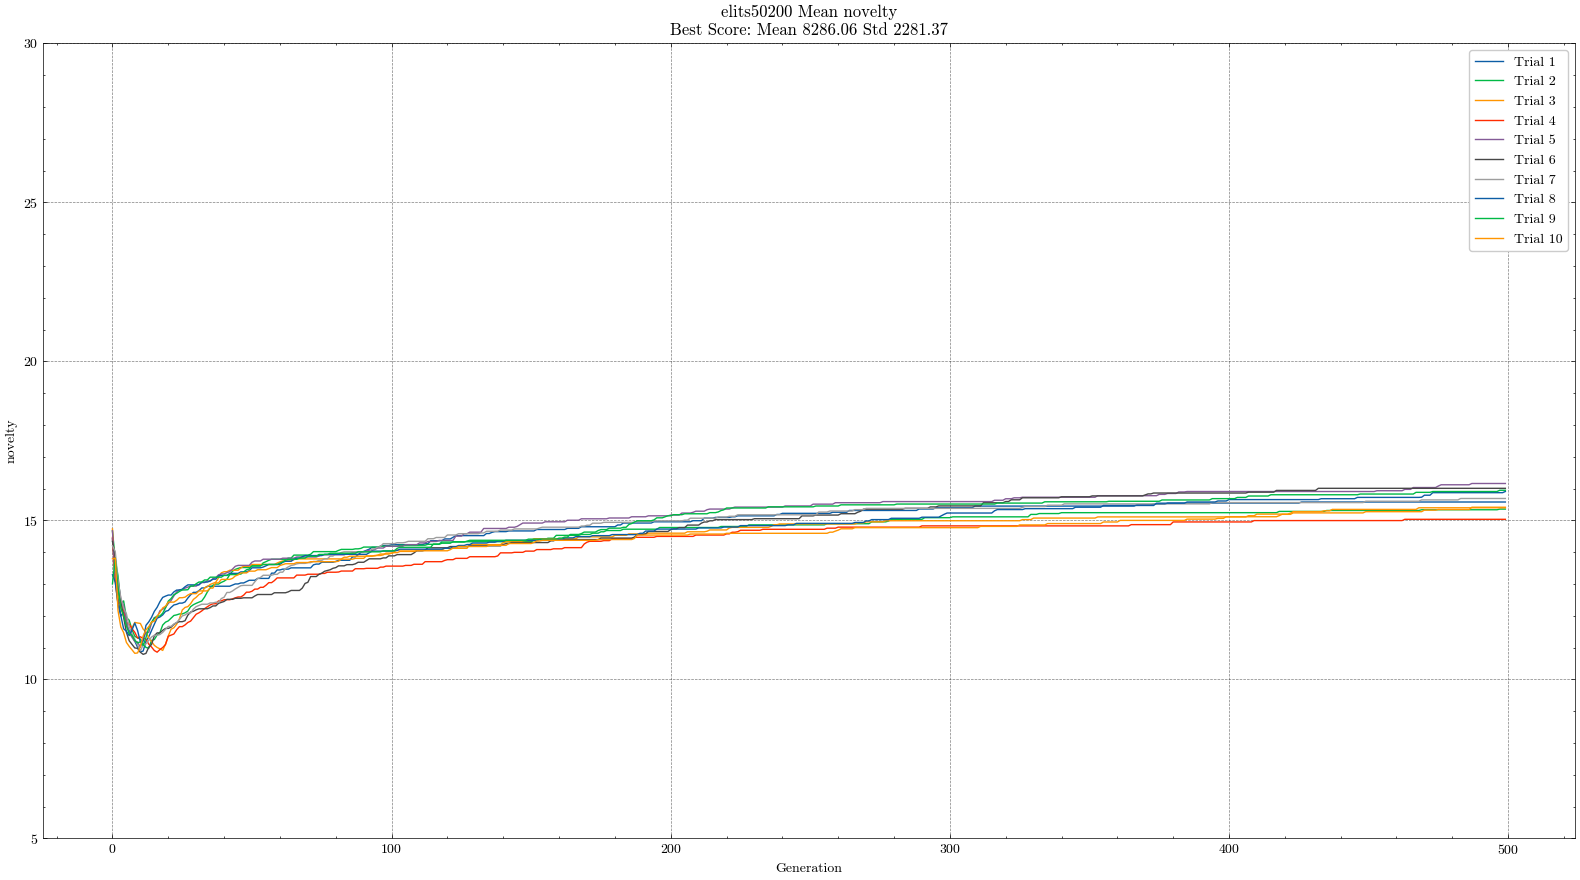

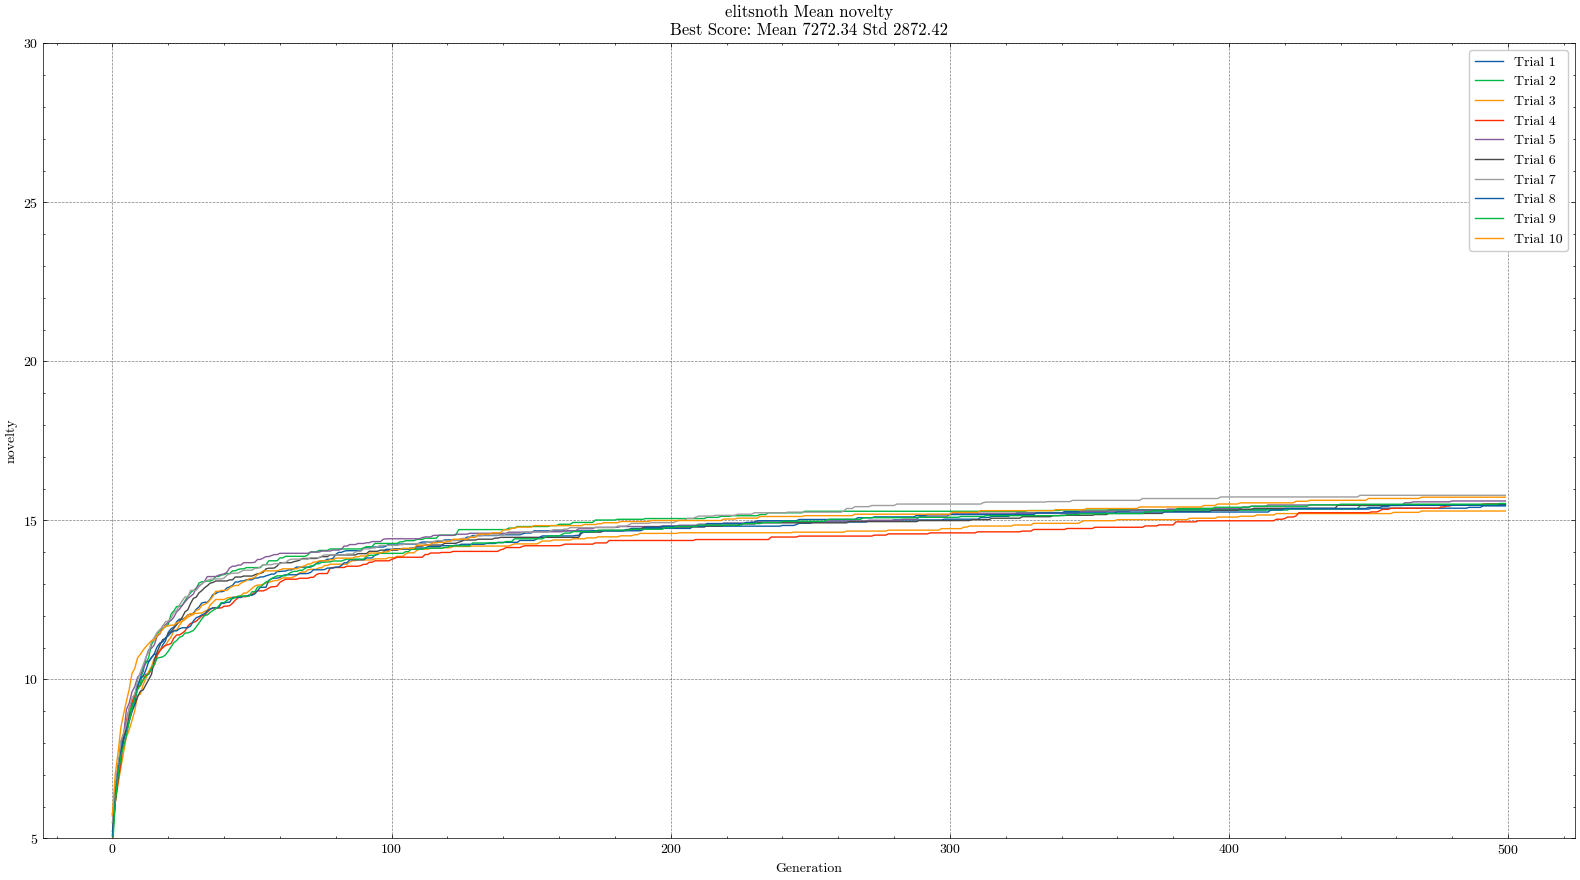

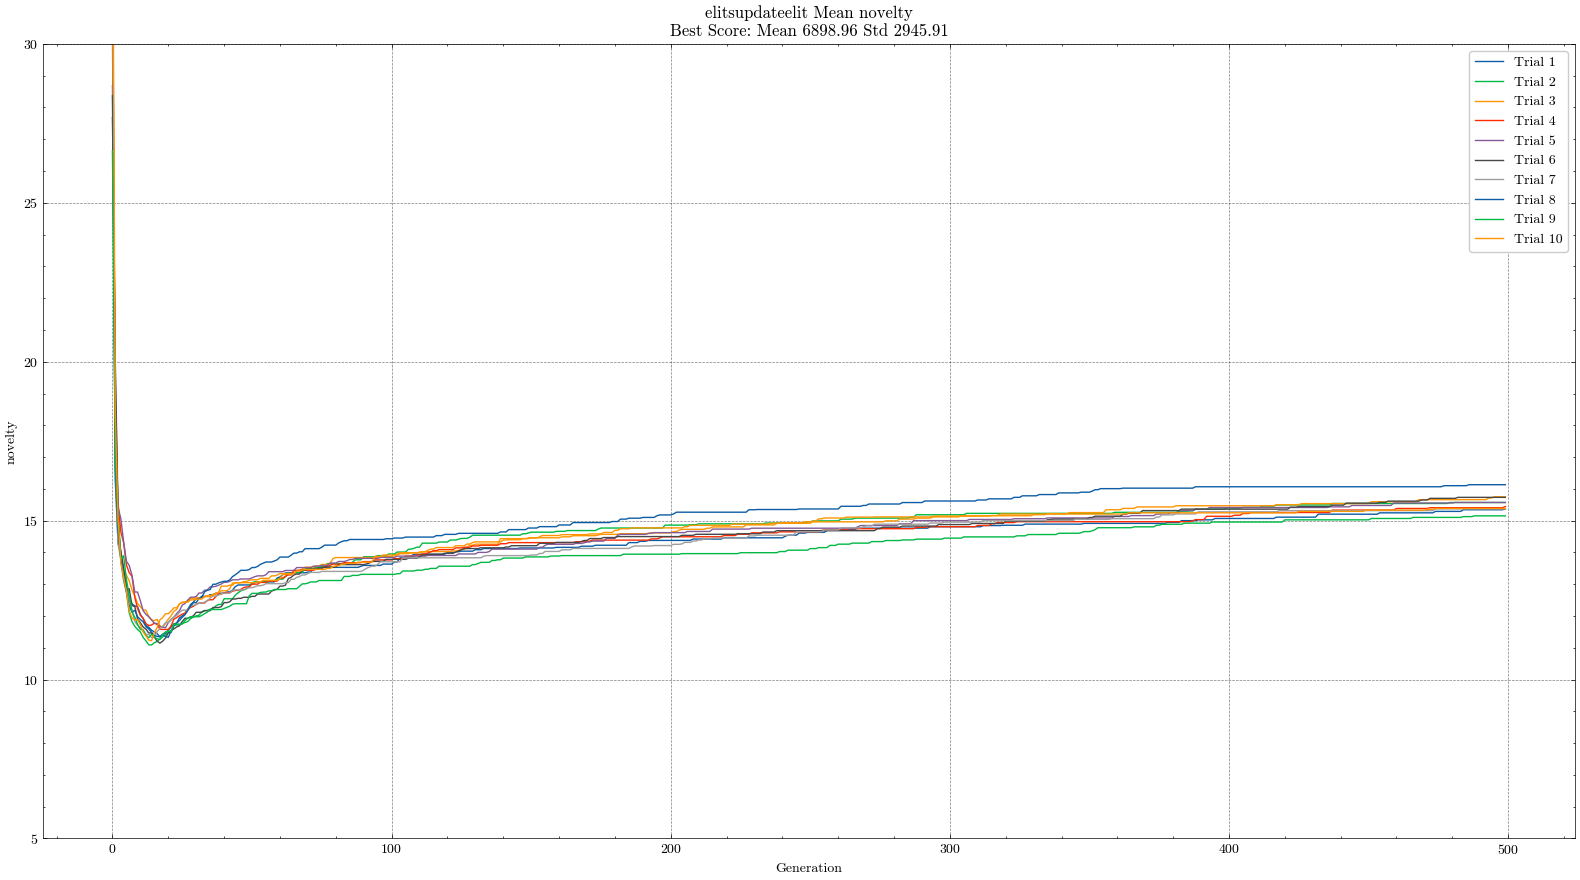

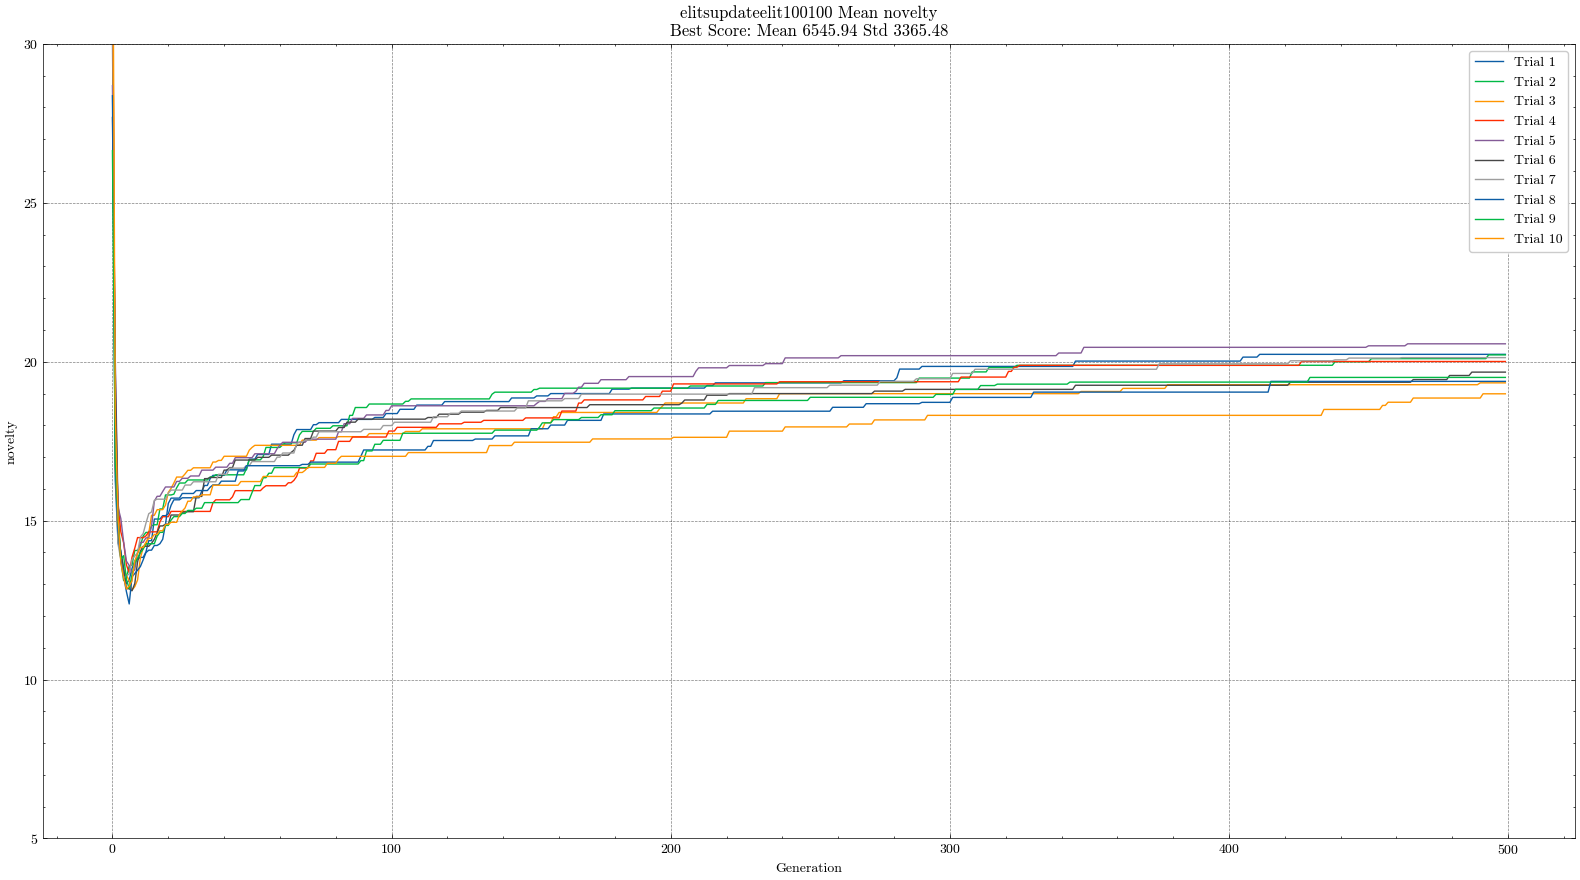

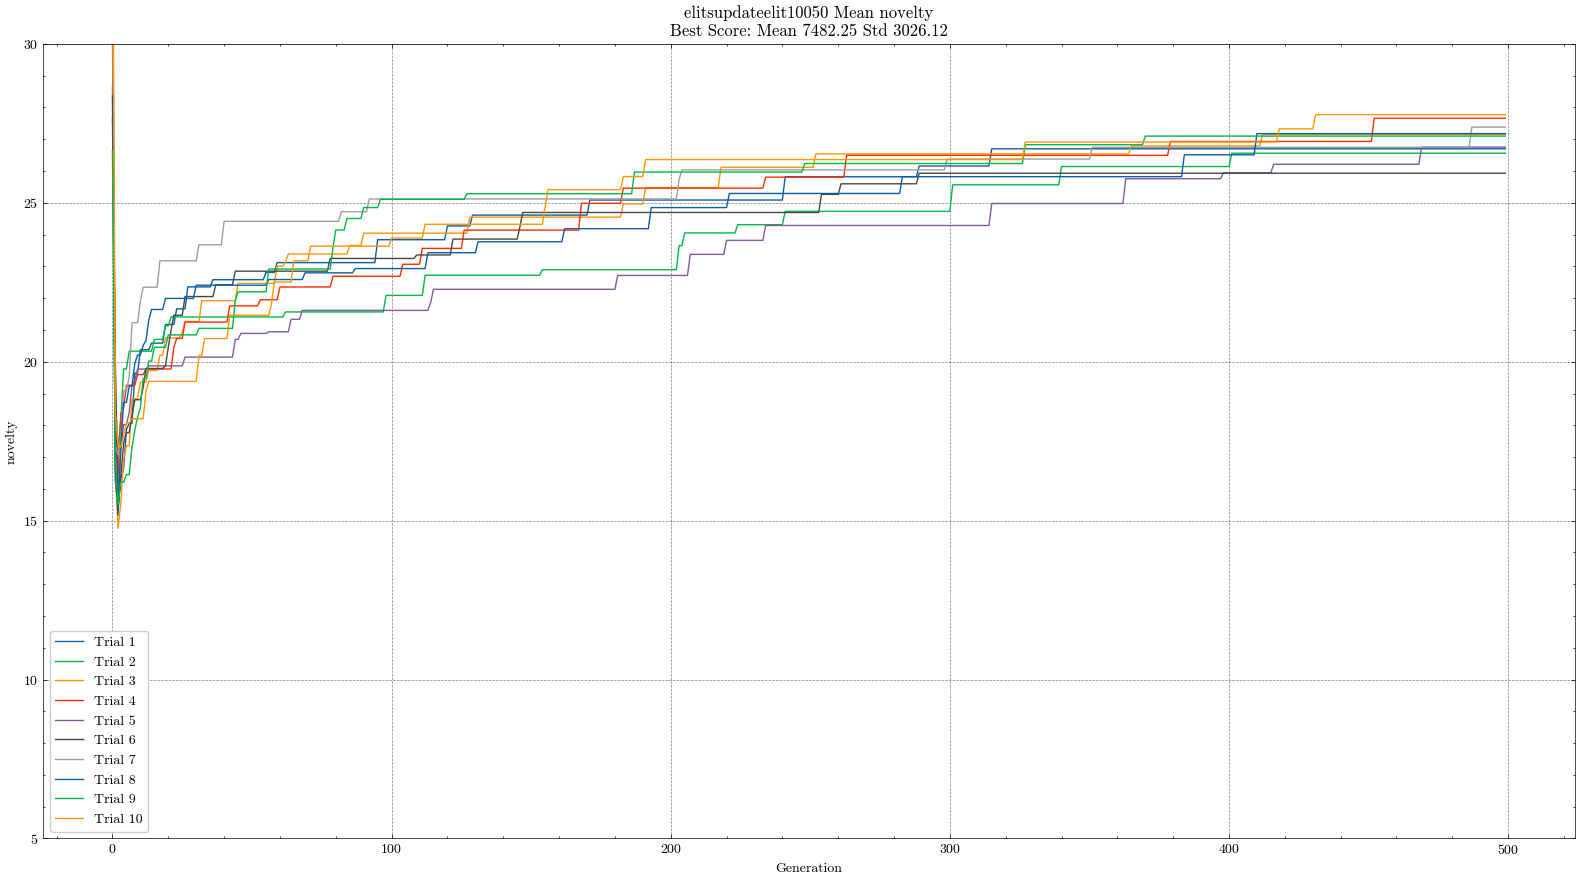

In [11]:
num_trials = 10

for exp_name in exp_name_uniques:
    # if os.path.exists(os.path.join(EXP_DIR, f"{exp_name}_archive_mean_novelty.png")):
    #     continue
    exp_traials = [data_dir for data_dir in data_dirs if data_dir.split("_")[0]==exp_name]
    exp_traials.sort()

    num_row = int(np.ceil(num_trials/3))
    plt.style.use(['science', 'grid', 'no-latex'])
    fig = plt.figure(figsize=(16, 9))
    best_score = []
    for i, exp_trial in enumerate(exp_traials[:num_trials]):
        df_history_nov = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_novelty_archive.csv"))
        df_history_best = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_fitness_archive.csv"))
        mean_nov, std_nov  = get_mean_std(df_history_nov)
        best_score.append(df_history_best["fitness"].max())

        plt.plot(mean_nov, label=f"Trial {i+1}")

    mean_best_score = np.mean(best_score)
    std_best_score = np.std(best_score)
    plt.title(f"{exp_name} Mean novelty\nBest Score: Mean {mean_best_score:.2f} Std {std_best_score:.2f}")
    plt.xlabel("Generation")
    plt.ylabel("novelty")
    plt.ylim(5, 30)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(EXP_DIR, f"{exp_name}_archive_mean_novelty.png"))
    plt.show()
    plt.close()

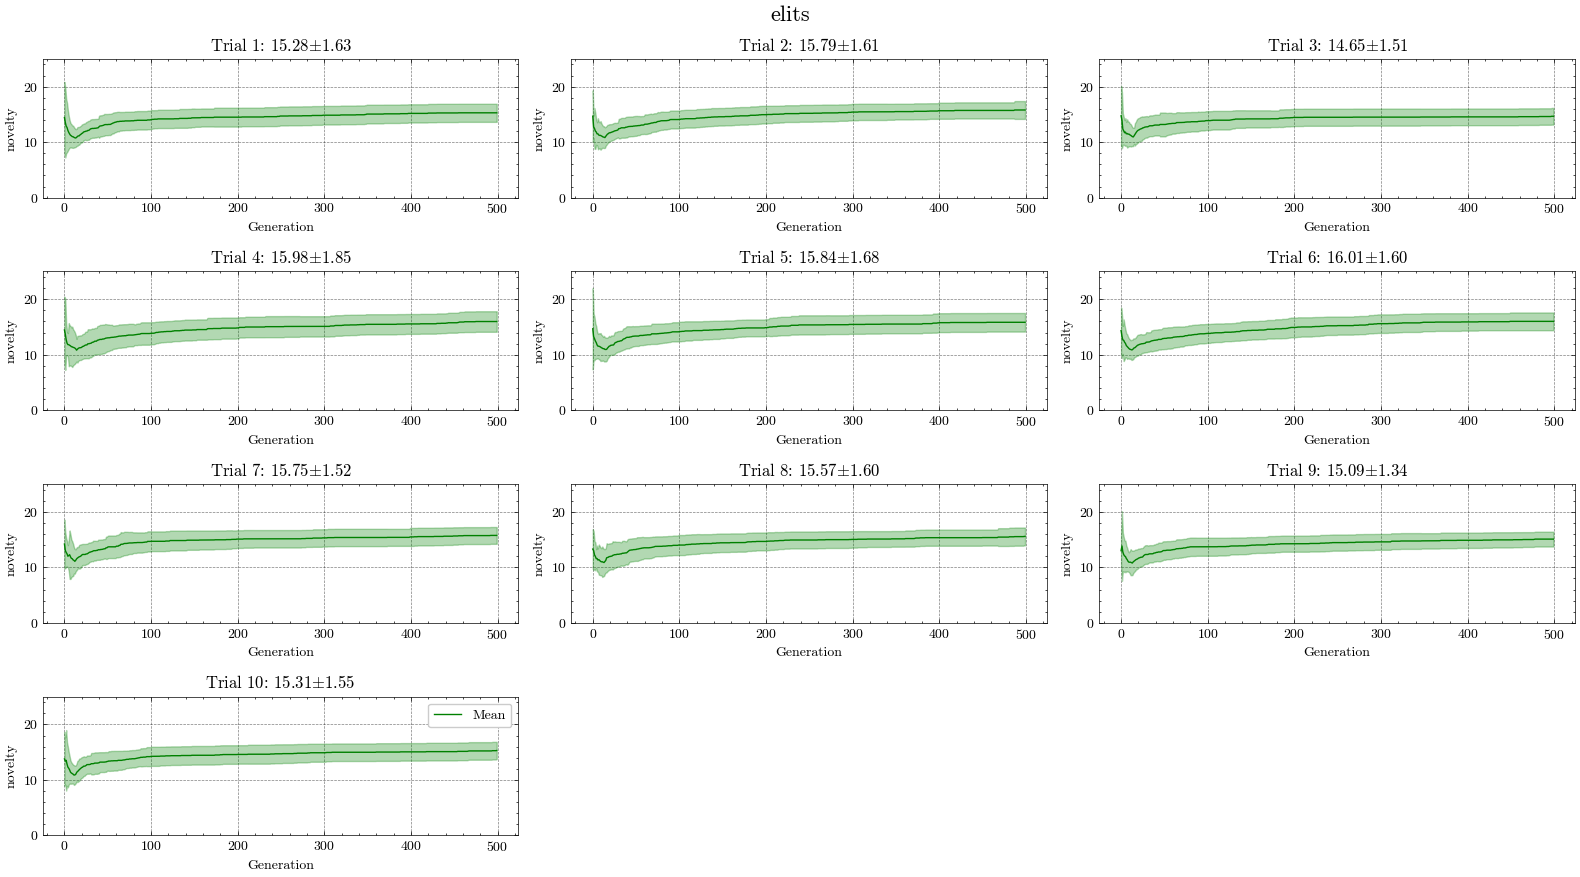

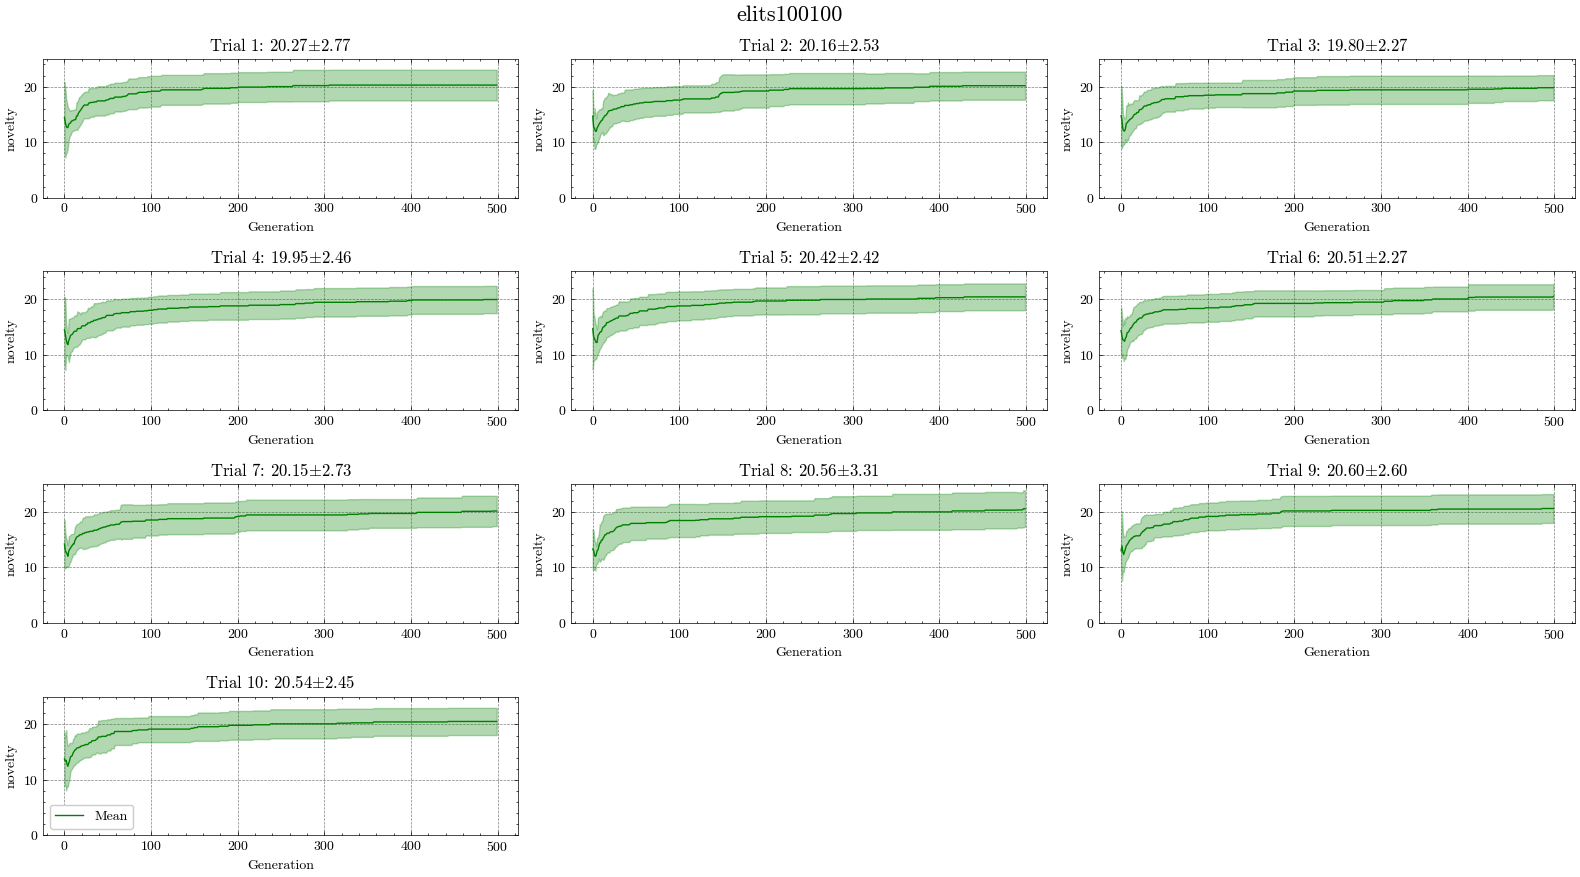

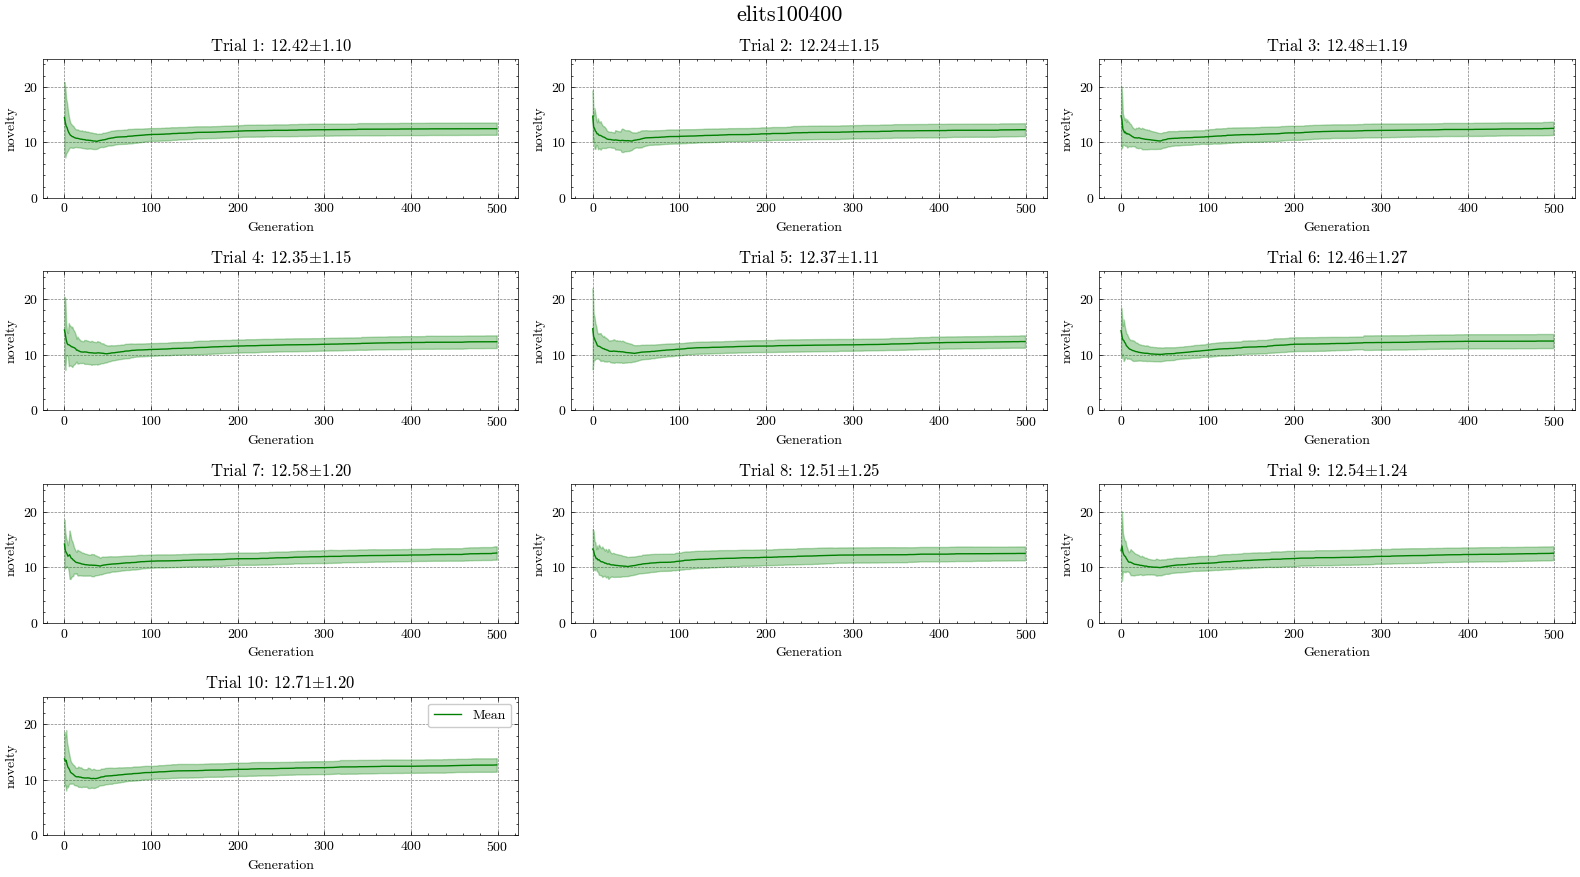

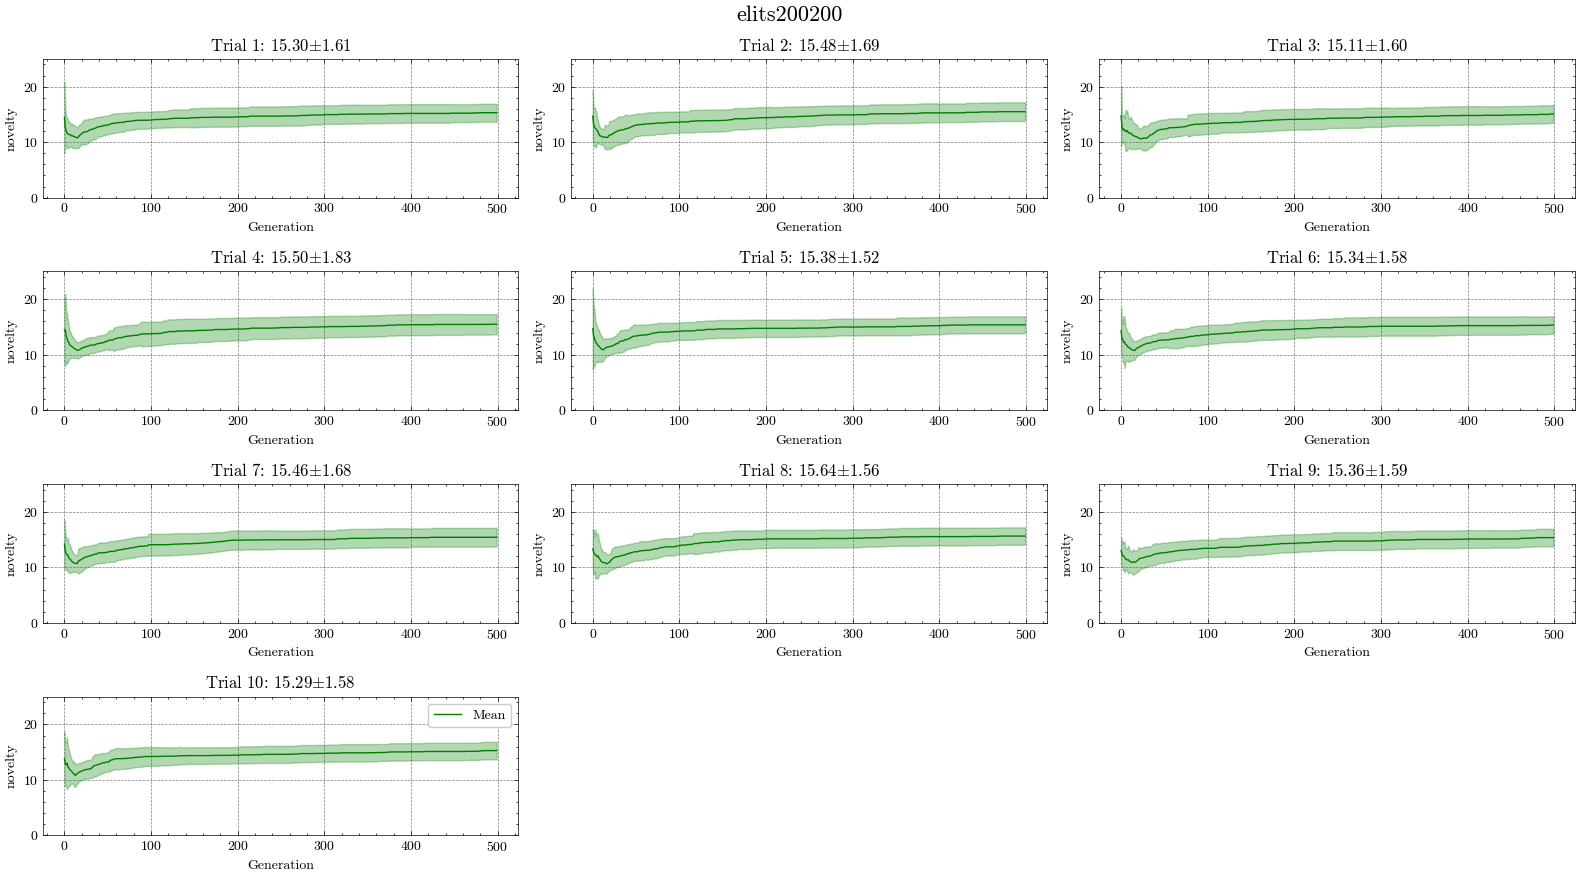

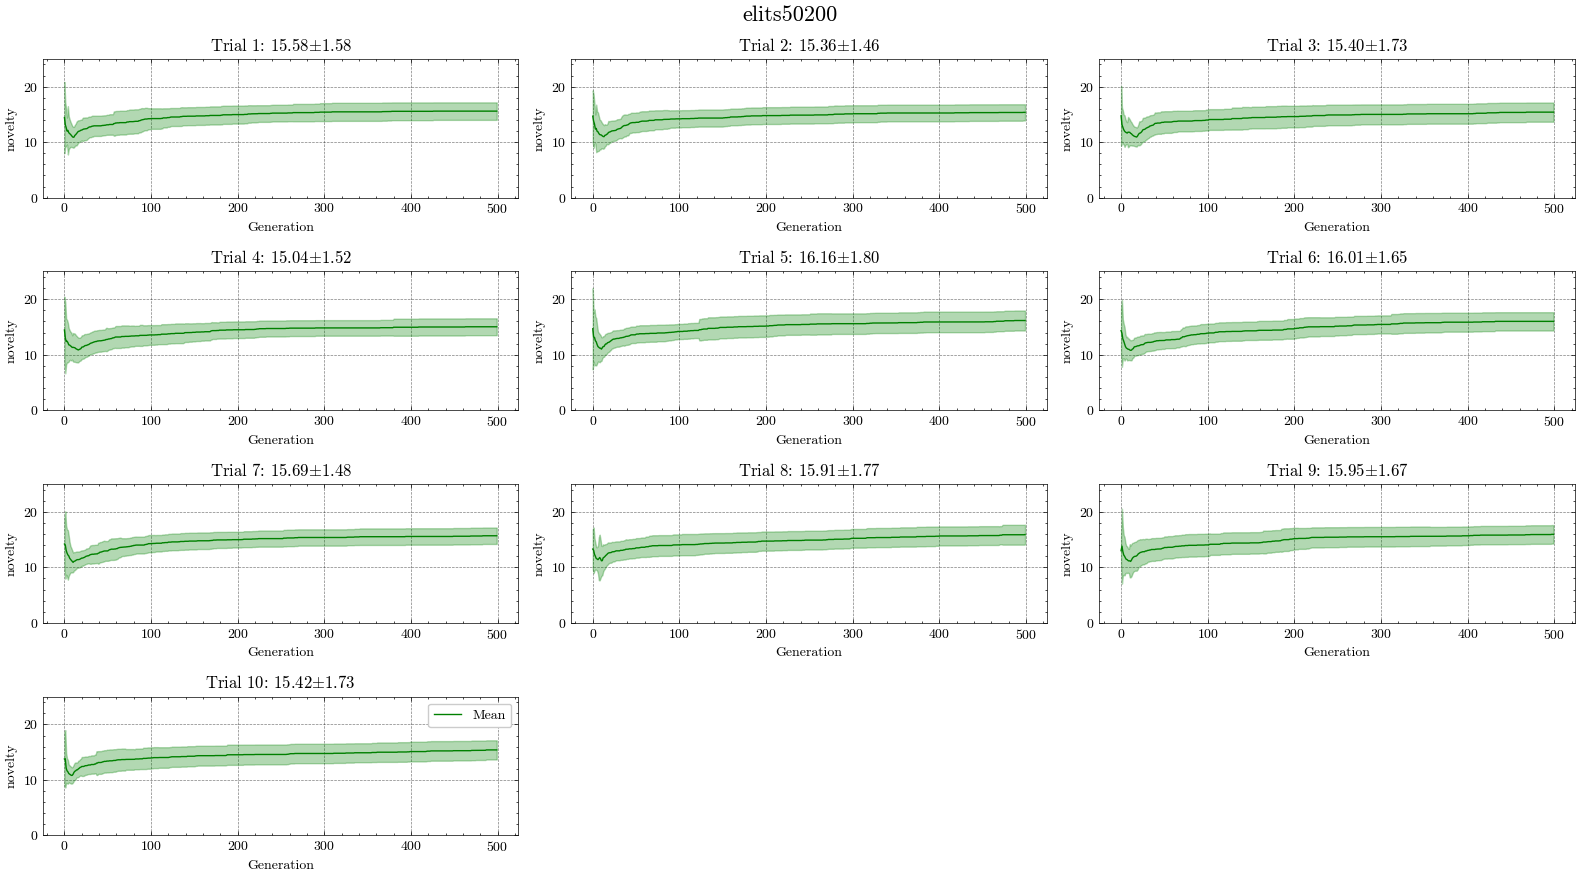

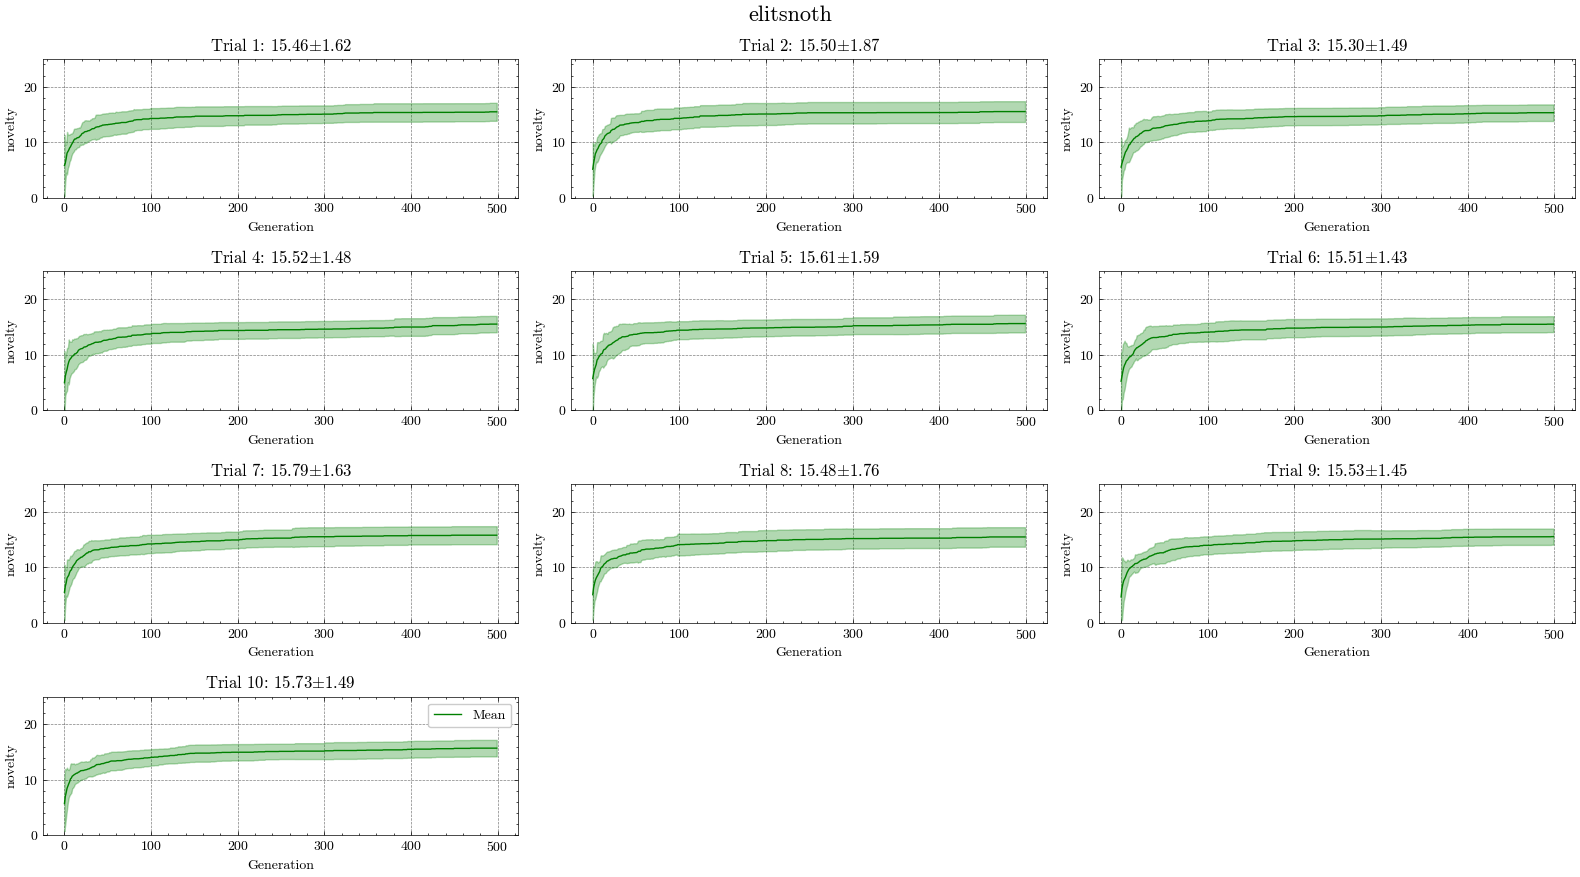

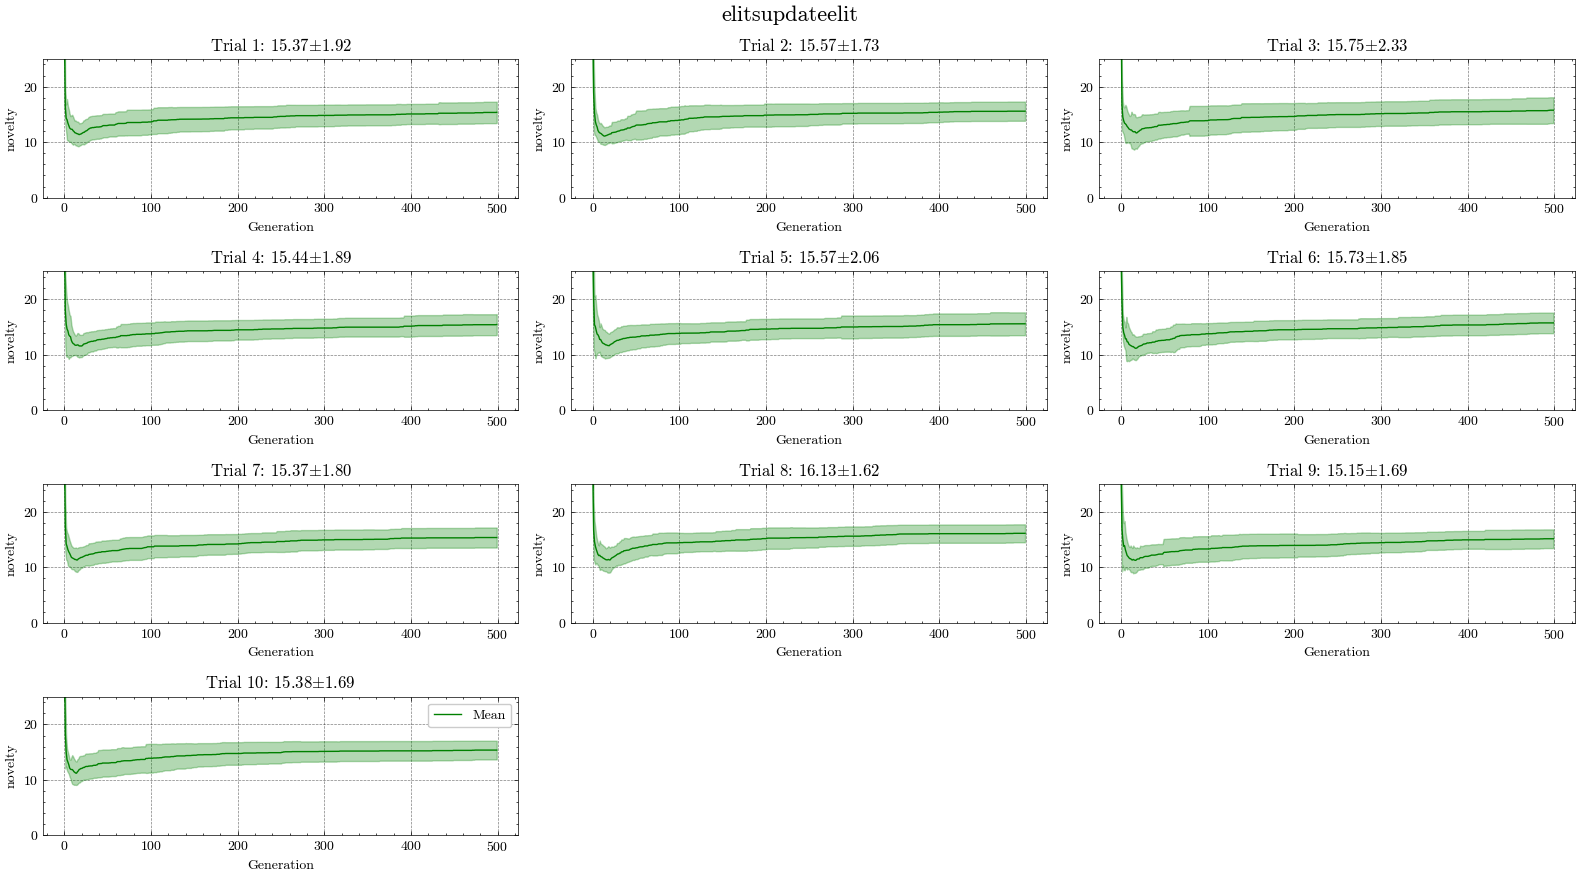

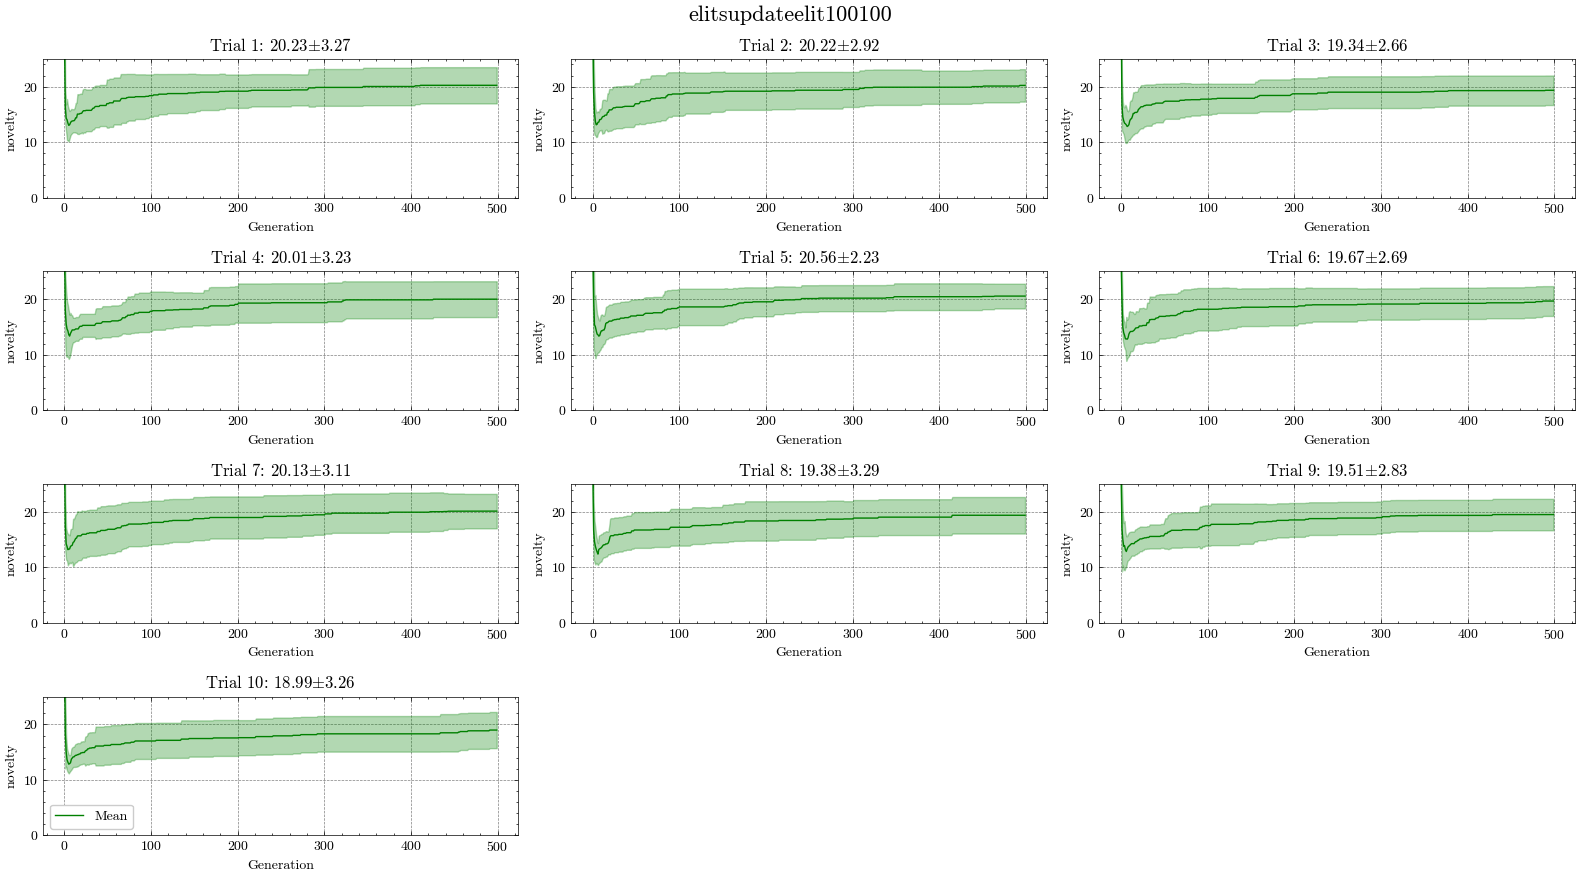

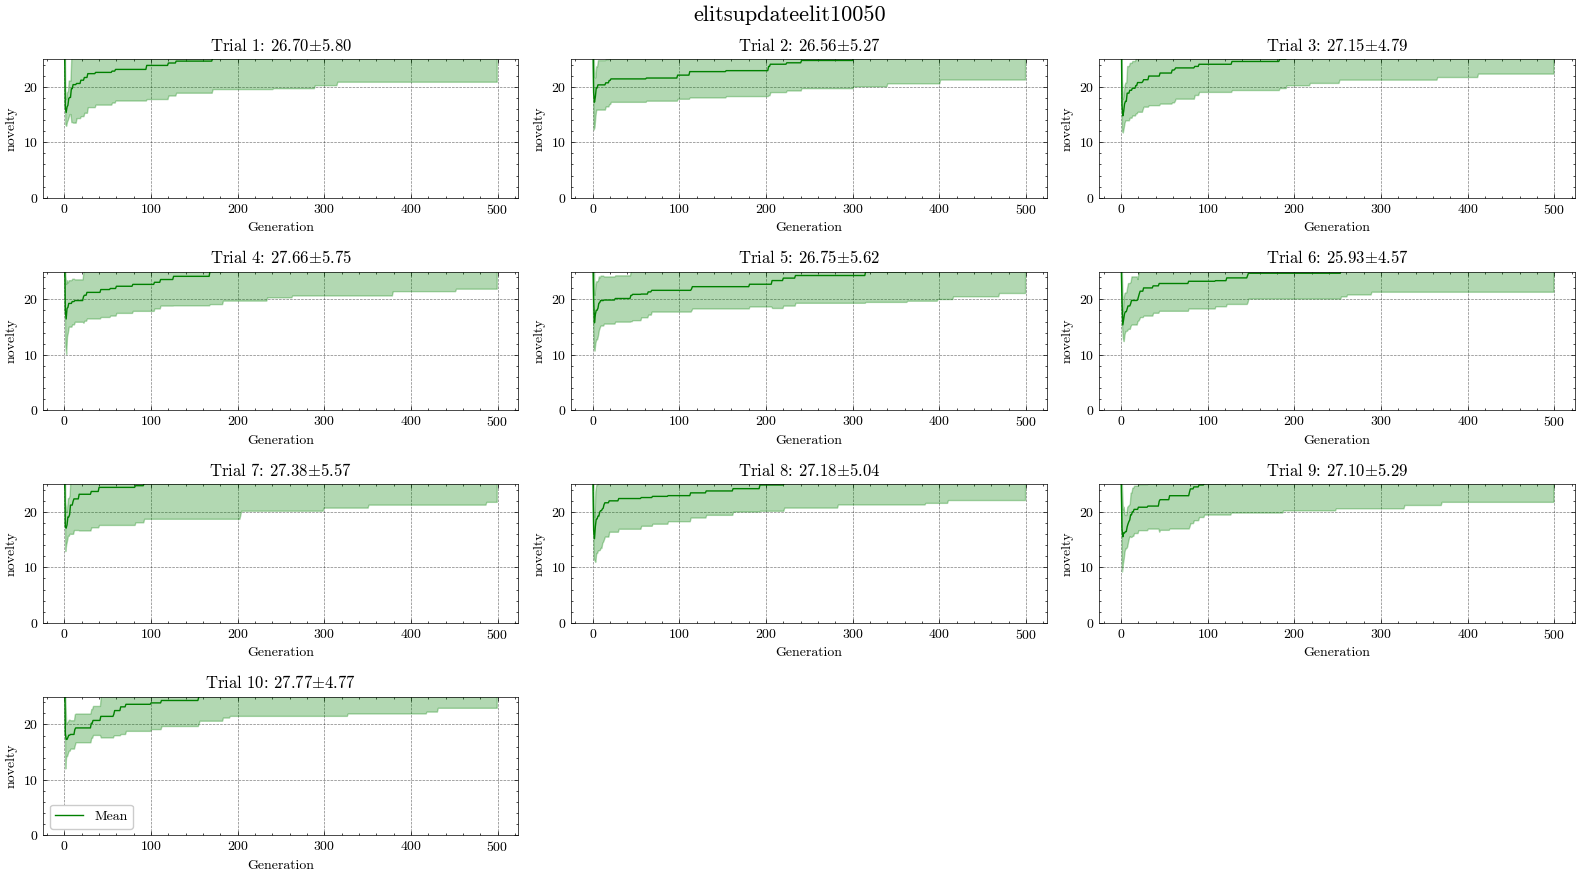

In [6]:
num_trials = 10

for exp_name in exp_name_uniques:
    if os.path.exists(os.path.join(EXP_DIR, f"{exp_name}_novelty.png")):
        continue
    exp_traials = [data_dir for data_dir in data_dirs if data_dir.split("_")[0]==exp_name]
    exp_traials.sort()

    num_row = int(np.ceil(num_trials/3))
    plt.style.use(['science', 'grid', 'no-latex'])
    fig = plt.figure(figsize=(16, 9))
    fig.suptitle(f"{exp_name}", fontsize=16)
    axs = [fig.add_subplot(num_row, 3, i+1) for i in range(num_trials)]
    # y軸は0から10000に固定
    for i, exp_trial in enumerate(exp_traials[:num_trials]):
        df_history_nov = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_novelty_archive.csv"))

        hist_avg_nov, hist_std_nov = get_mean_std(df_history_nov)

        axs[i].plot(hist_avg_nov, label="Mean", color="green")
        axs[i].fill_between(range(len(hist_avg_nov)), hist_avg_nov-hist_std_nov, hist_avg_nov+hist_std_nov, color="green", alpha=0.3)
        axs[i].set_ylim(0, 25)
        axs[i].set_title(f"Trial {i+1}: {hist_avg_nov[-1]:.2f}$\pm${hist_std_nov[-1]:.2f}")
        axs[i].set_xlabel("Generation")
        axs[i].set_ylabel("novelty")
        if i == num_trials-1:
            axs[i].legend()

    plt.tight_layout()
    plt.savefig(os.path.join(EXP_DIR, f"{exp_name}novelty.png"))
    plt.show()
    plt.close()

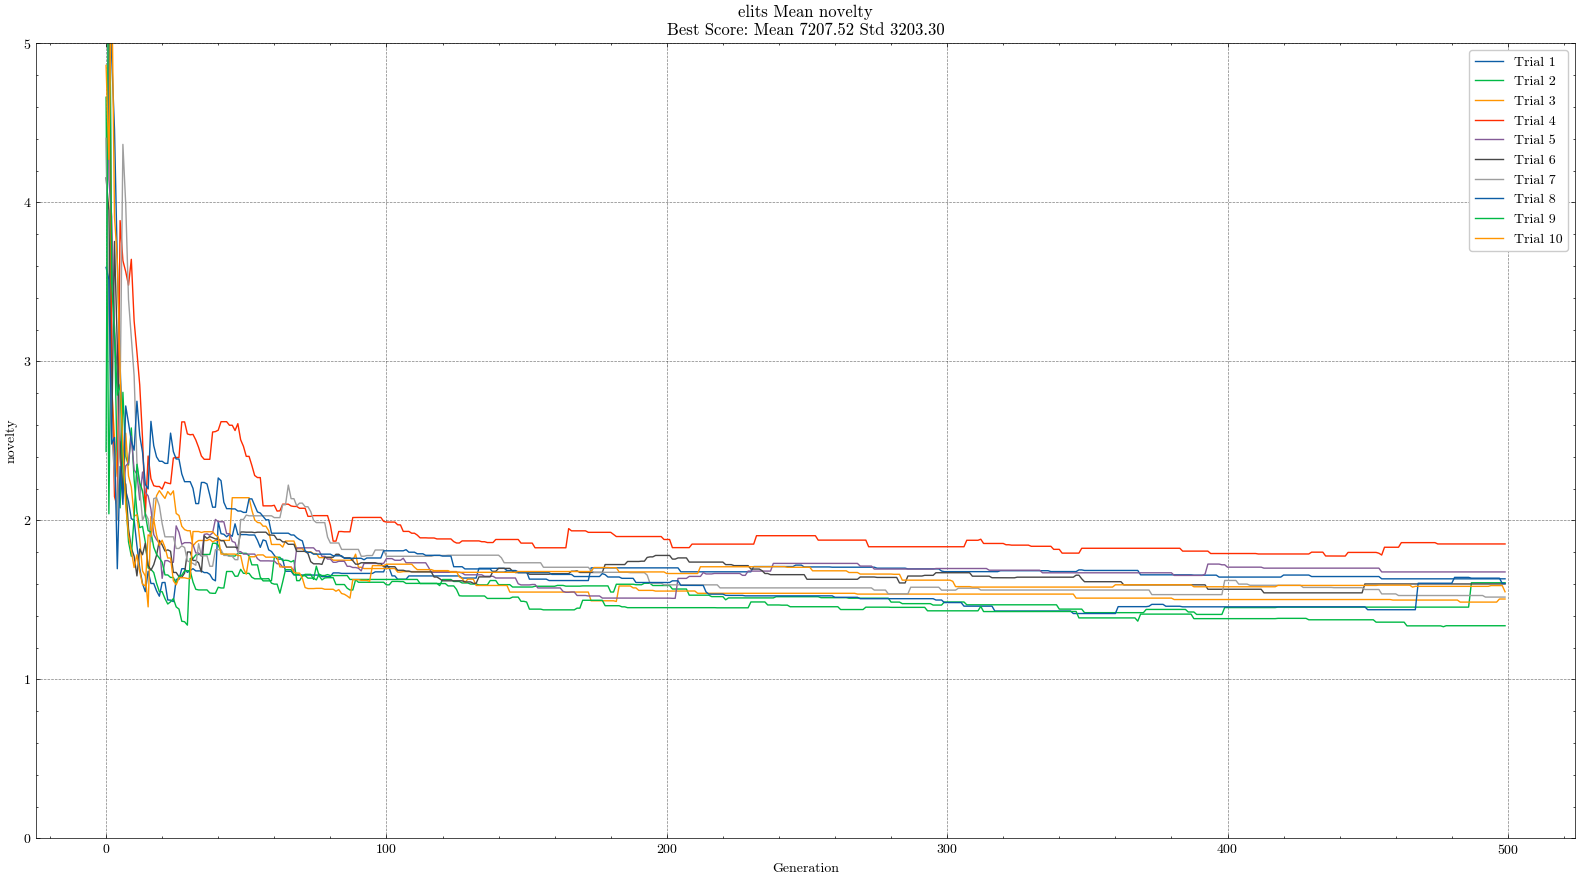

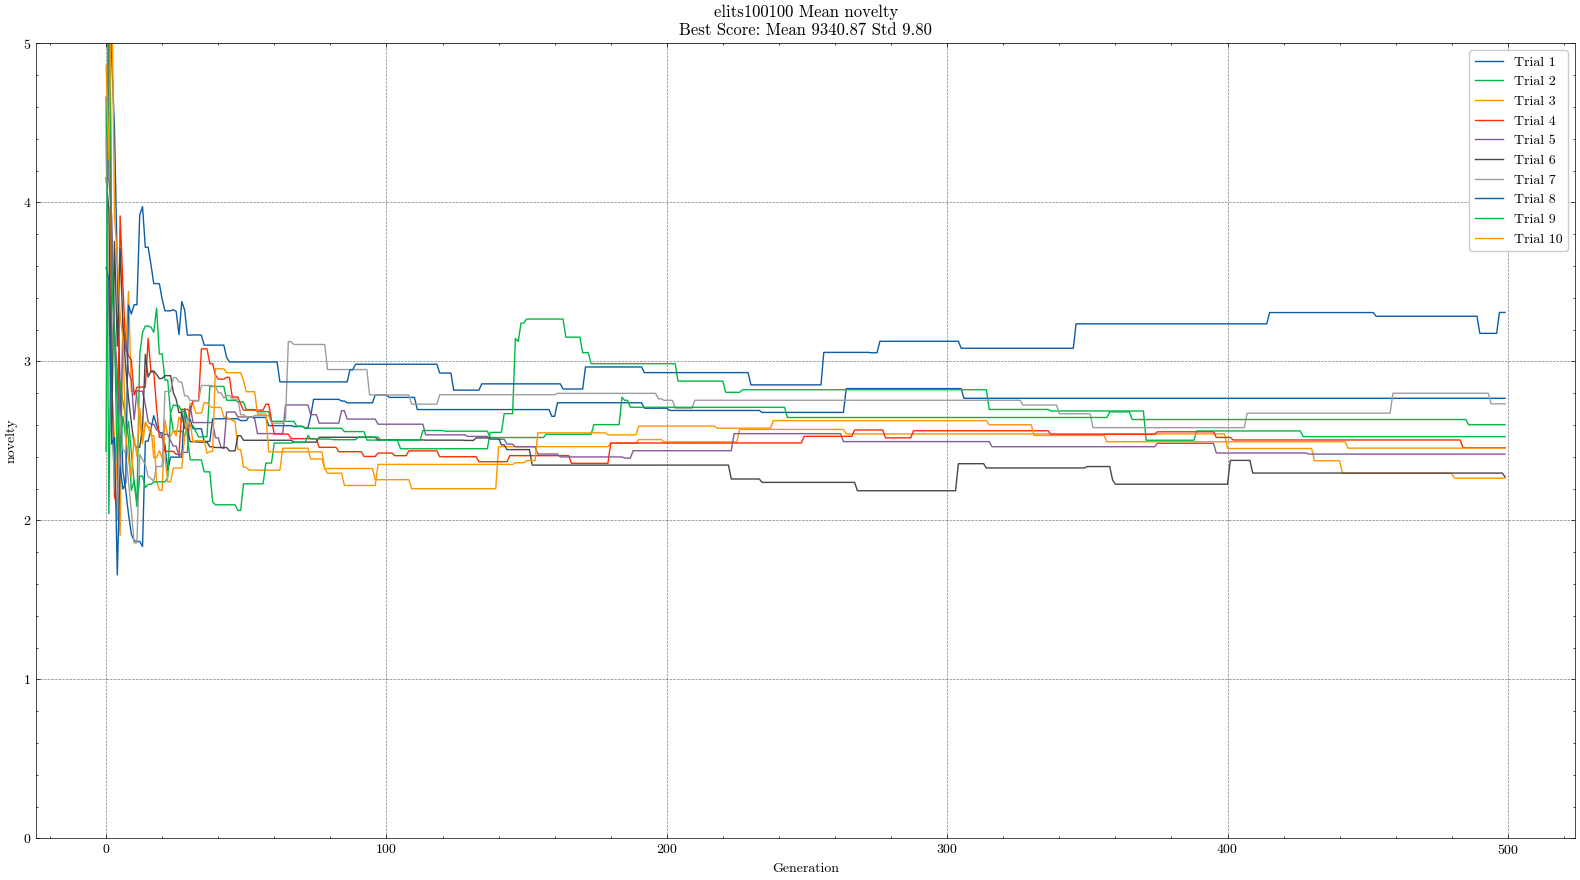

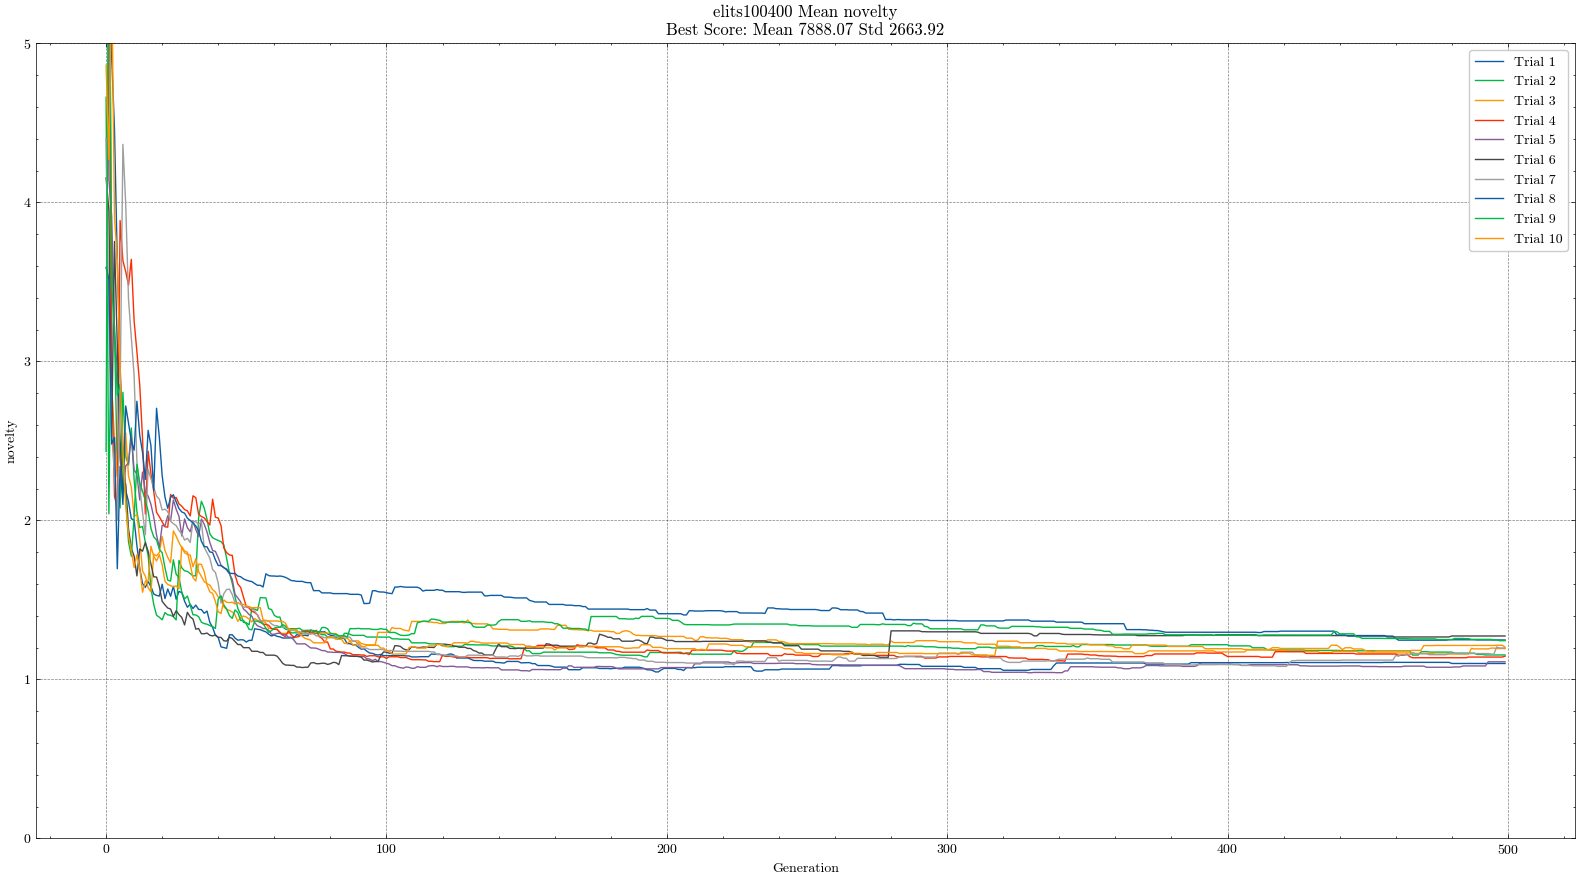

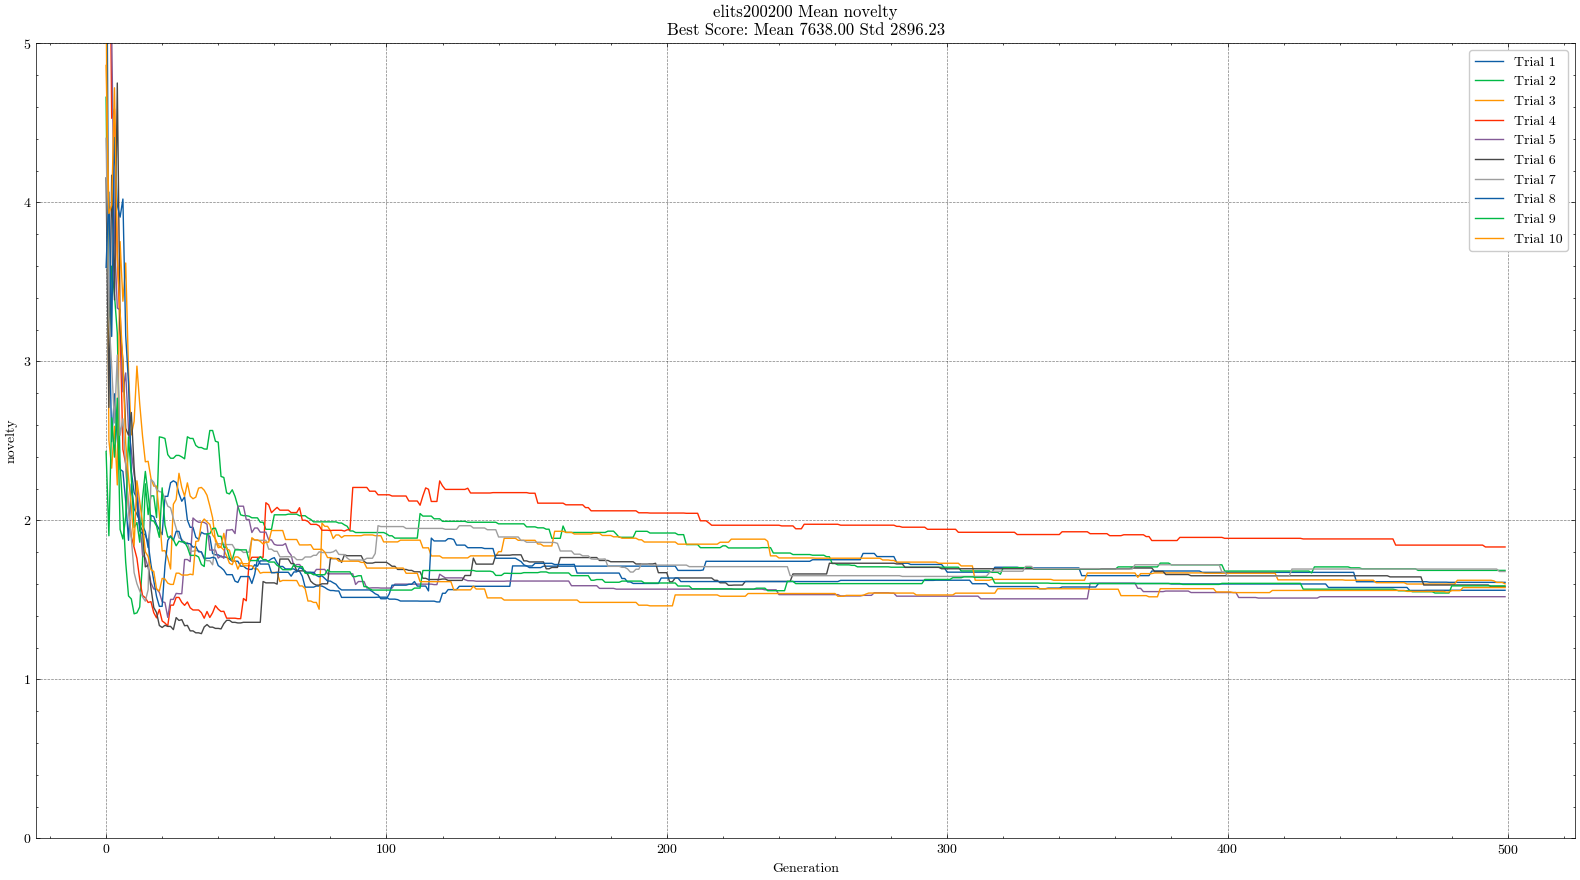

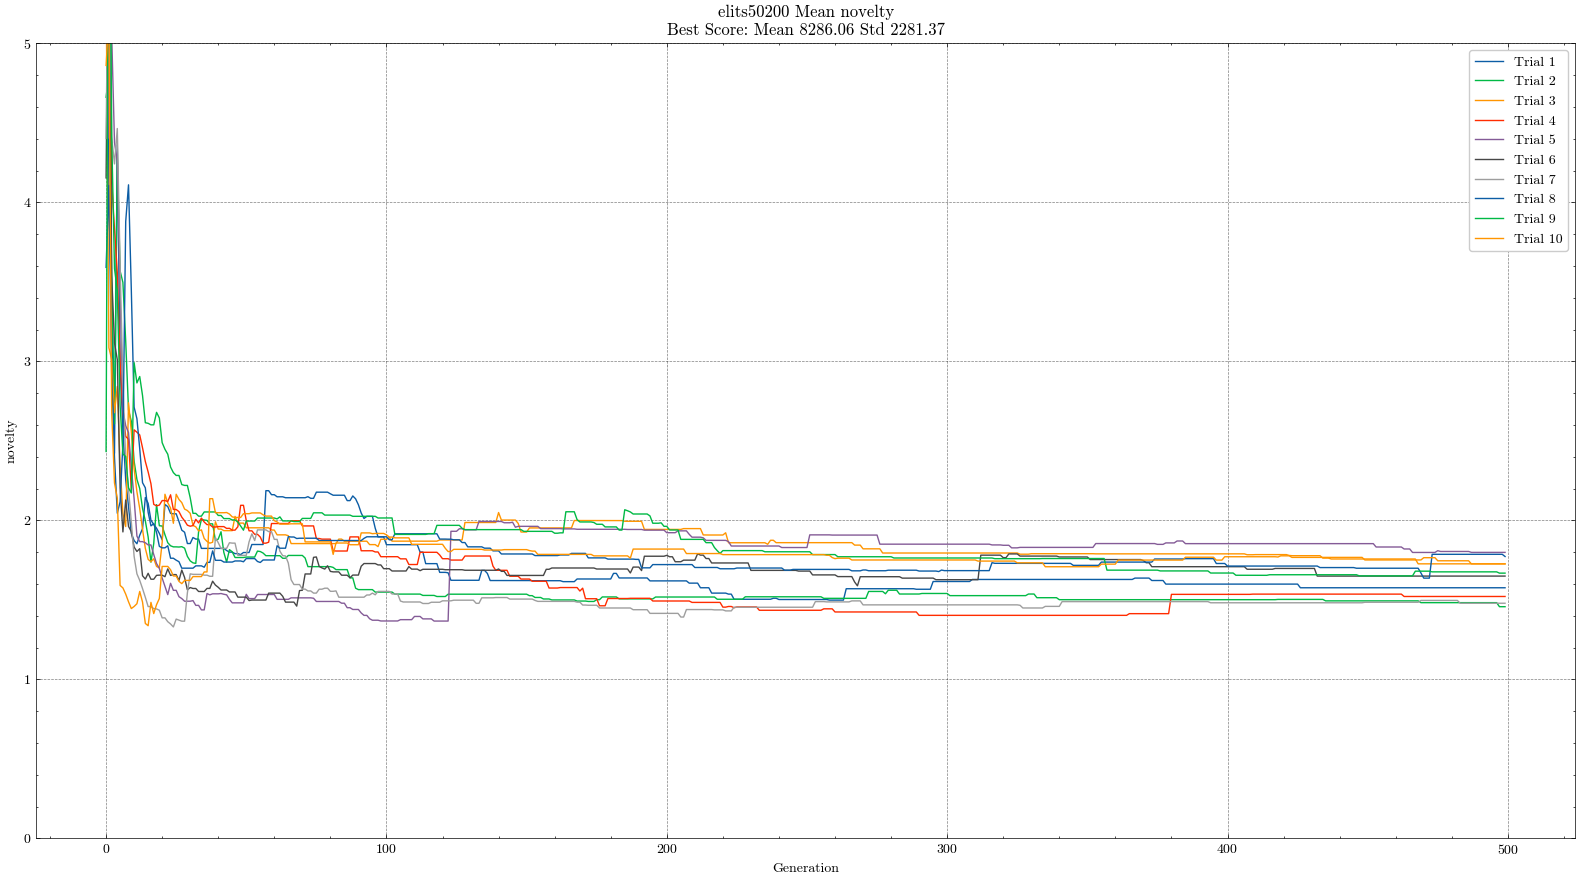

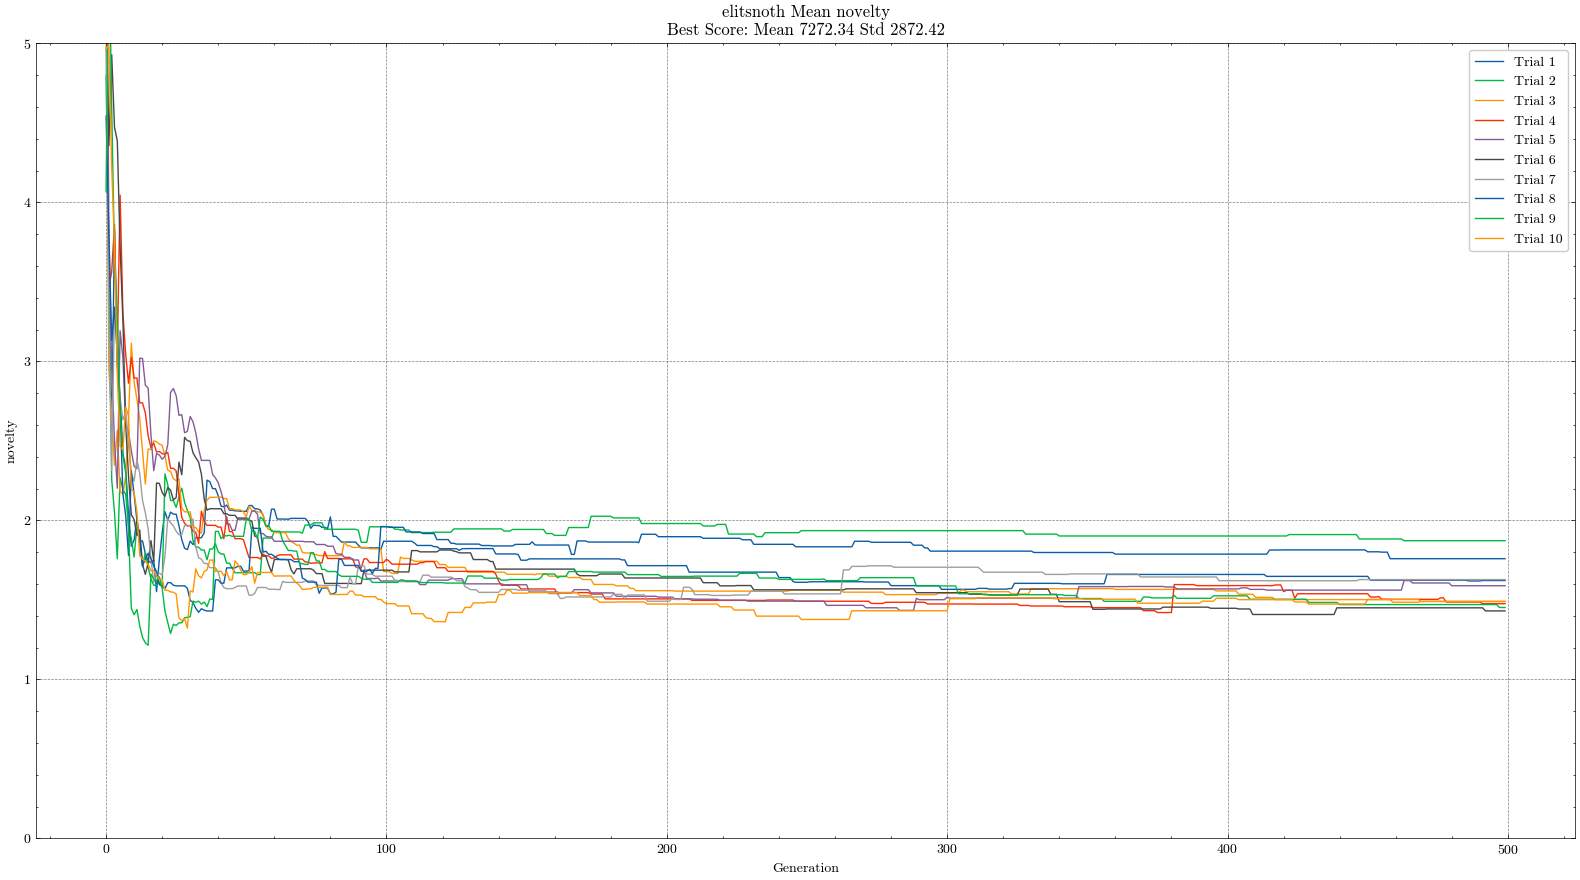

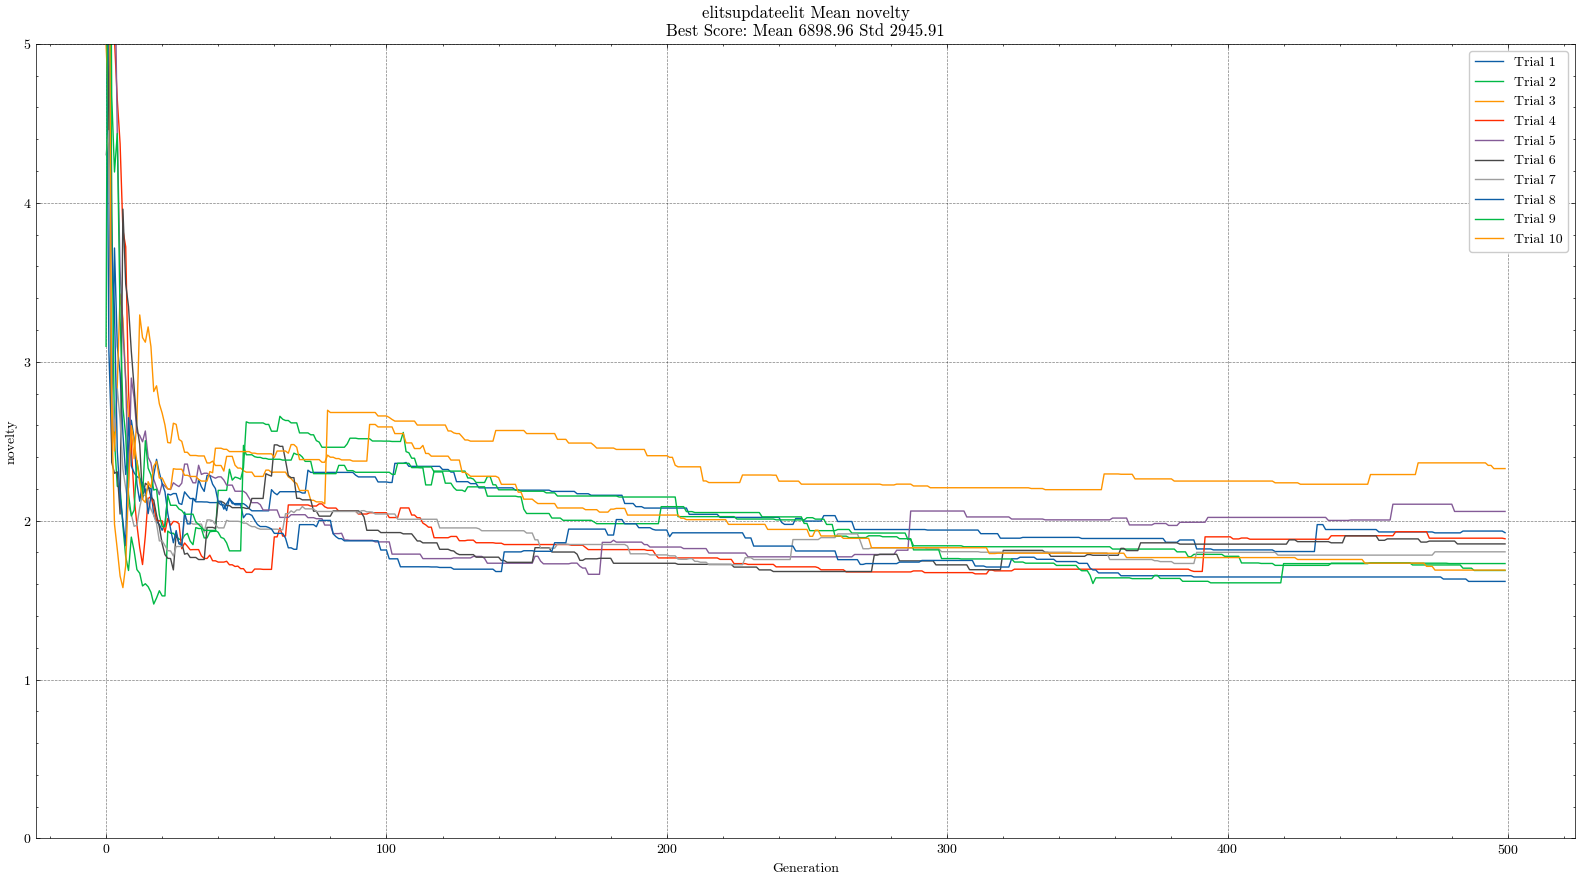

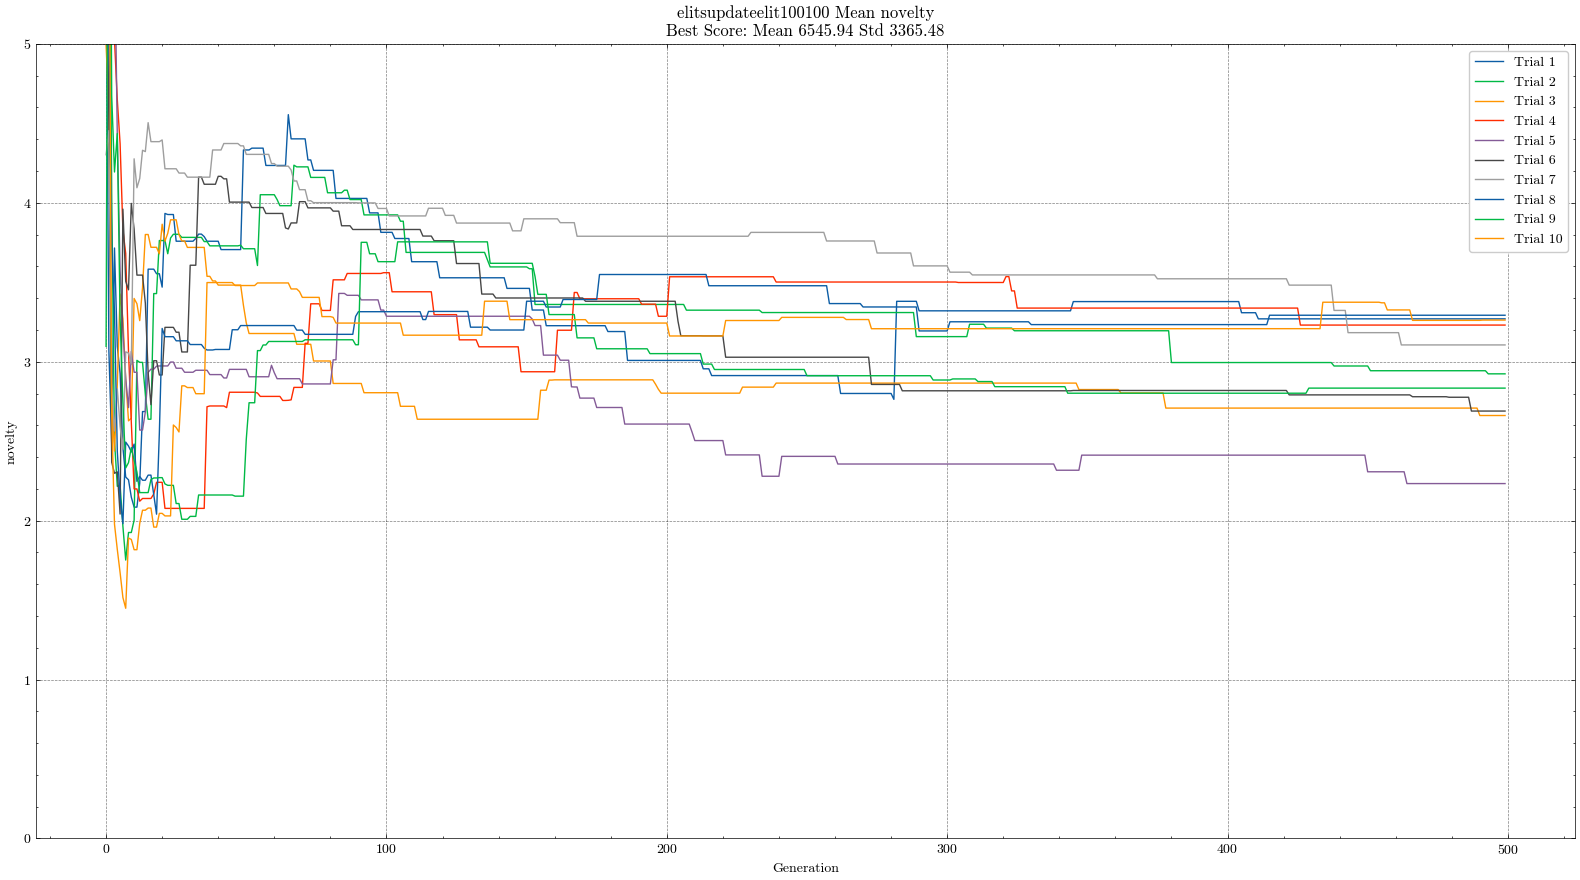

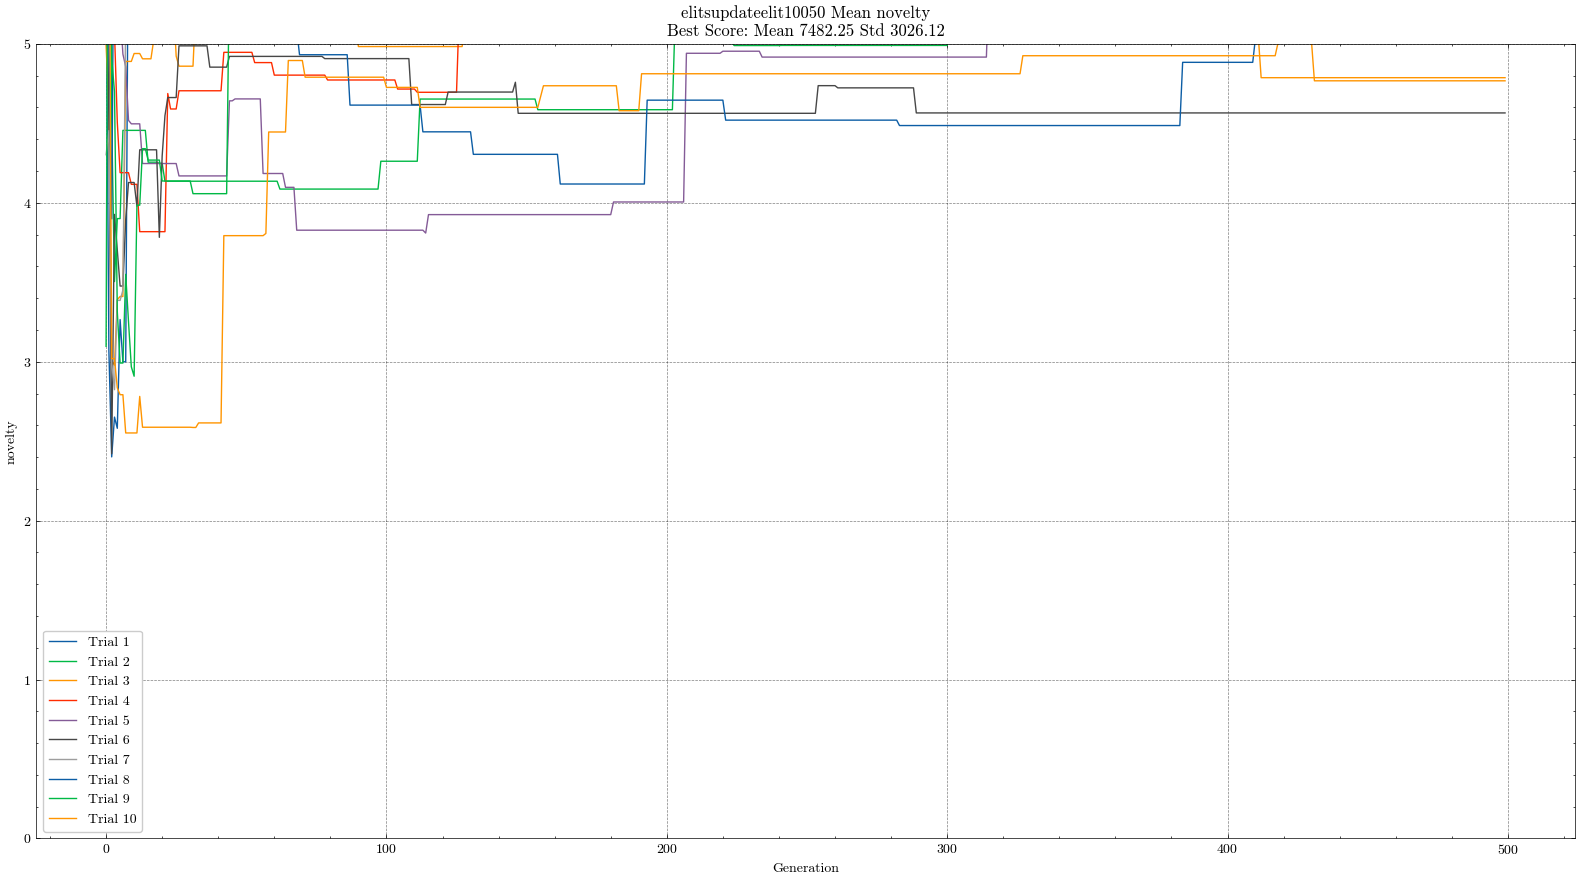

In [7]:
num_trials = 10

for exp_name in exp_name_uniques:
    # if os.path.exists(os.path.join(EXP_DIR, f"{exp_name}_archive_mean_novelty.png")):
    #     continue
    exp_traials = [data_dir for data_dir in data_dirs if data_dir.split("_")[0]==exp_name]
    exp_traials.sort()

    num_row = int(np.ceil(num_trials/3))
    plt.style.use(['science', 'grid', 'no-latex'])
    fig = plt.figure(figsize=(16, 9))
    best_score = []
    for i, exp_trial in enumerate(exp_traials[:num_trials]):
        df_history_nov = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_novelty_archive.csv"))
        df_history_best = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_fitness_archive.csv"))
        mean_nov, std_nov  = get_mean_std(df_history_nov)
        best_score.append(df_history_best["fitness"].max())

        plt.plot(std_nov, label=f"Trial {i+1}")

    mean_best_score = np.mean(best_score)
    std_best_score = np.std(best_score)
    plt.title(f"{exp_name} Mean novelty\nBest Score: Mean {mean_best_score:.2f} Std {std_best_score:.2f}")
    plt.xlabel("Generation")
    plt.ylabel("novelty")
    plt.ylim(0, 5)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(EXP_DIR, f"{exp_name}_archive_std_novelty.png"))
    plt.show()
    plt.close()

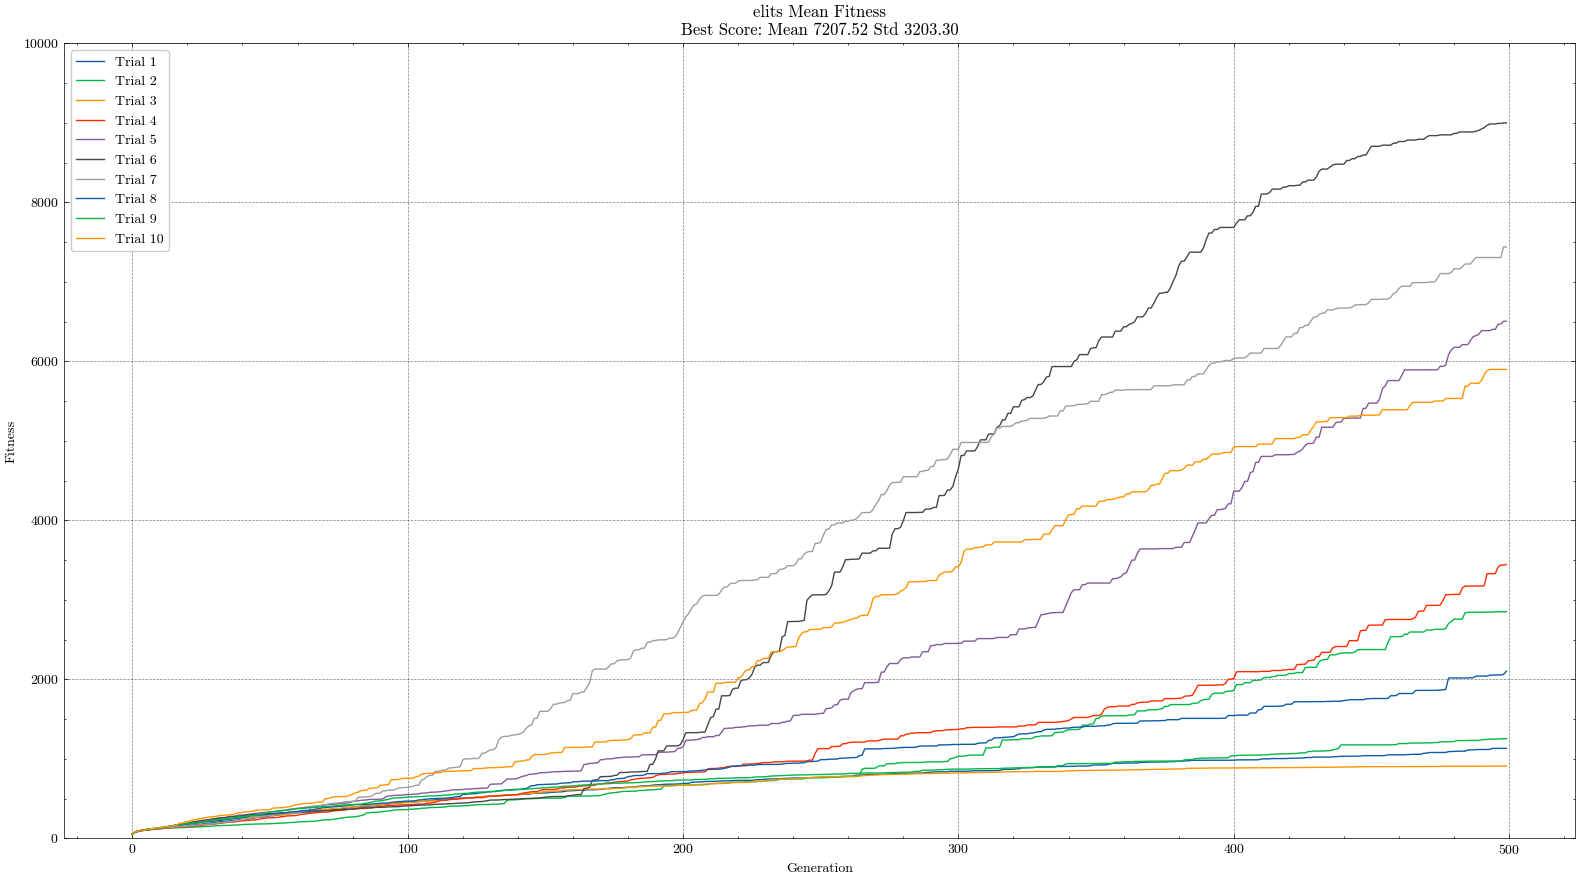

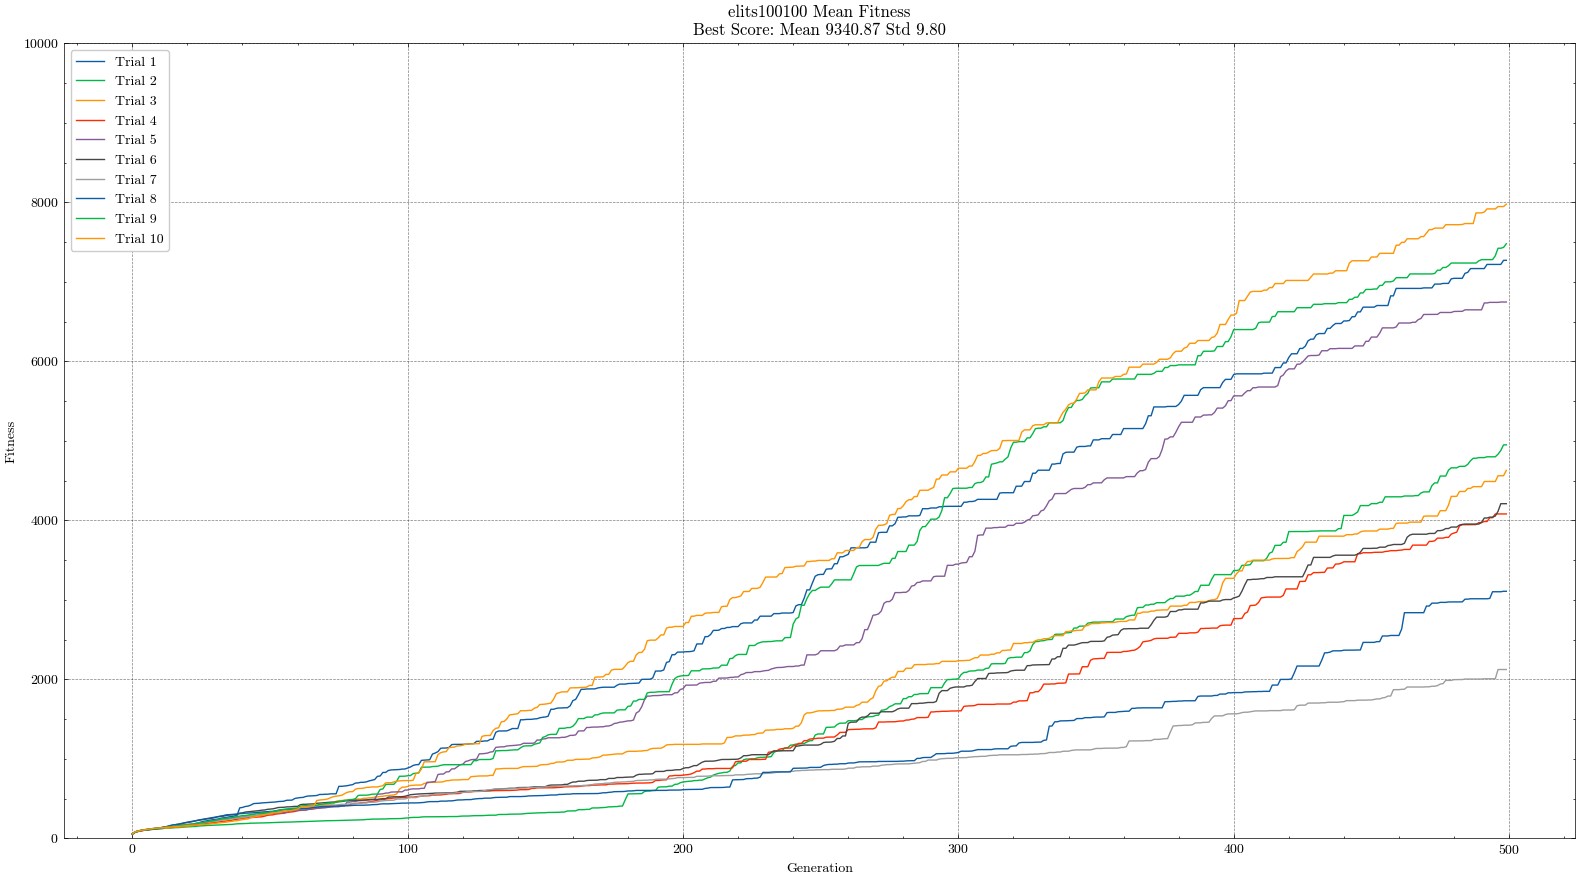

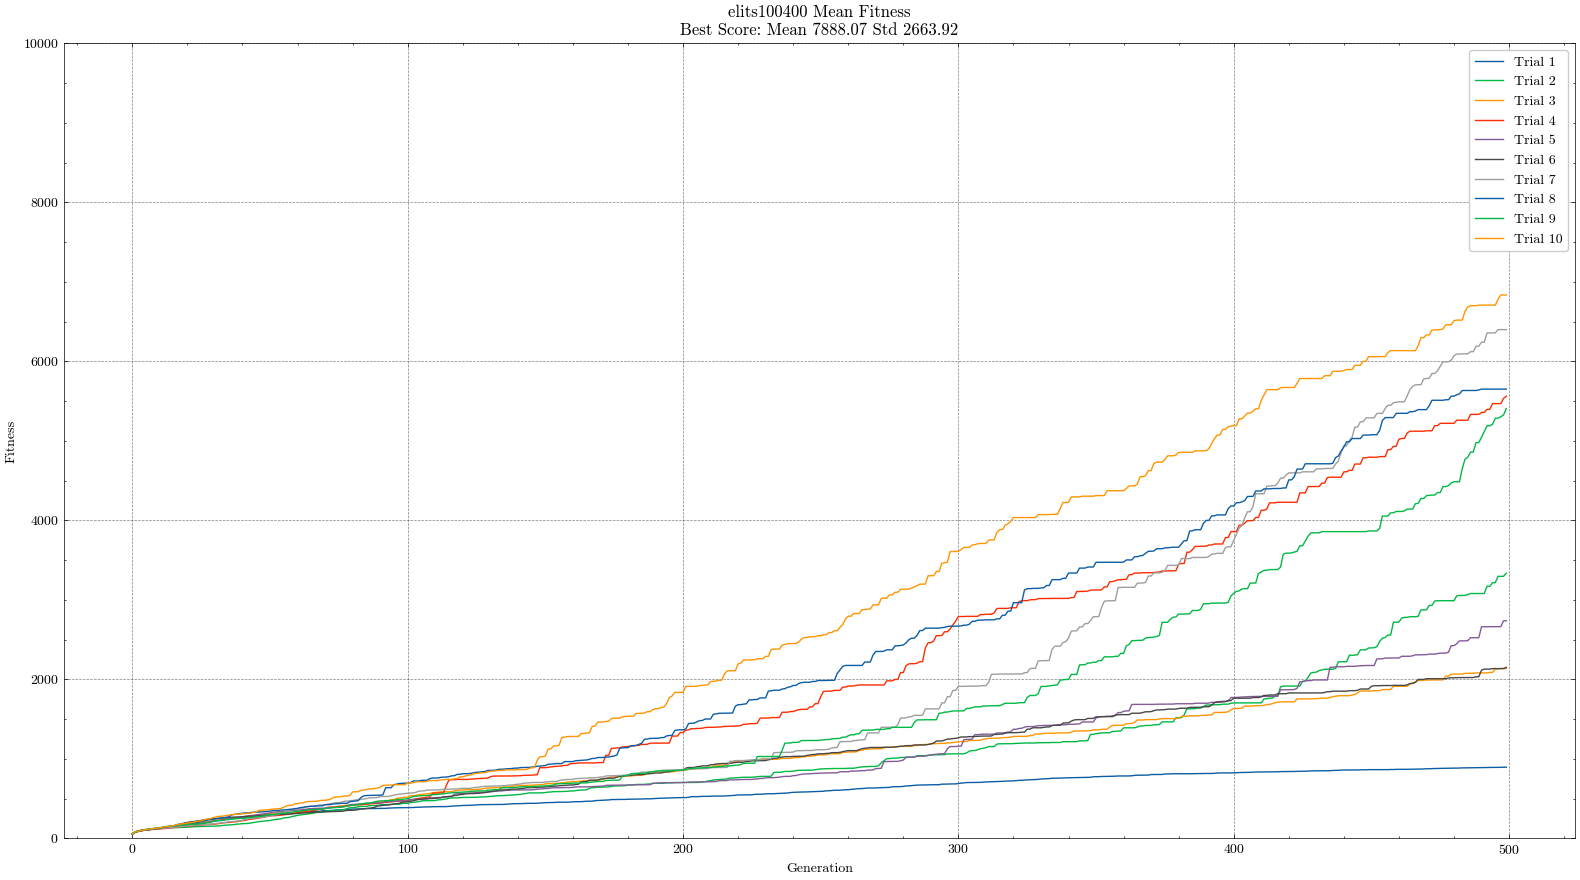

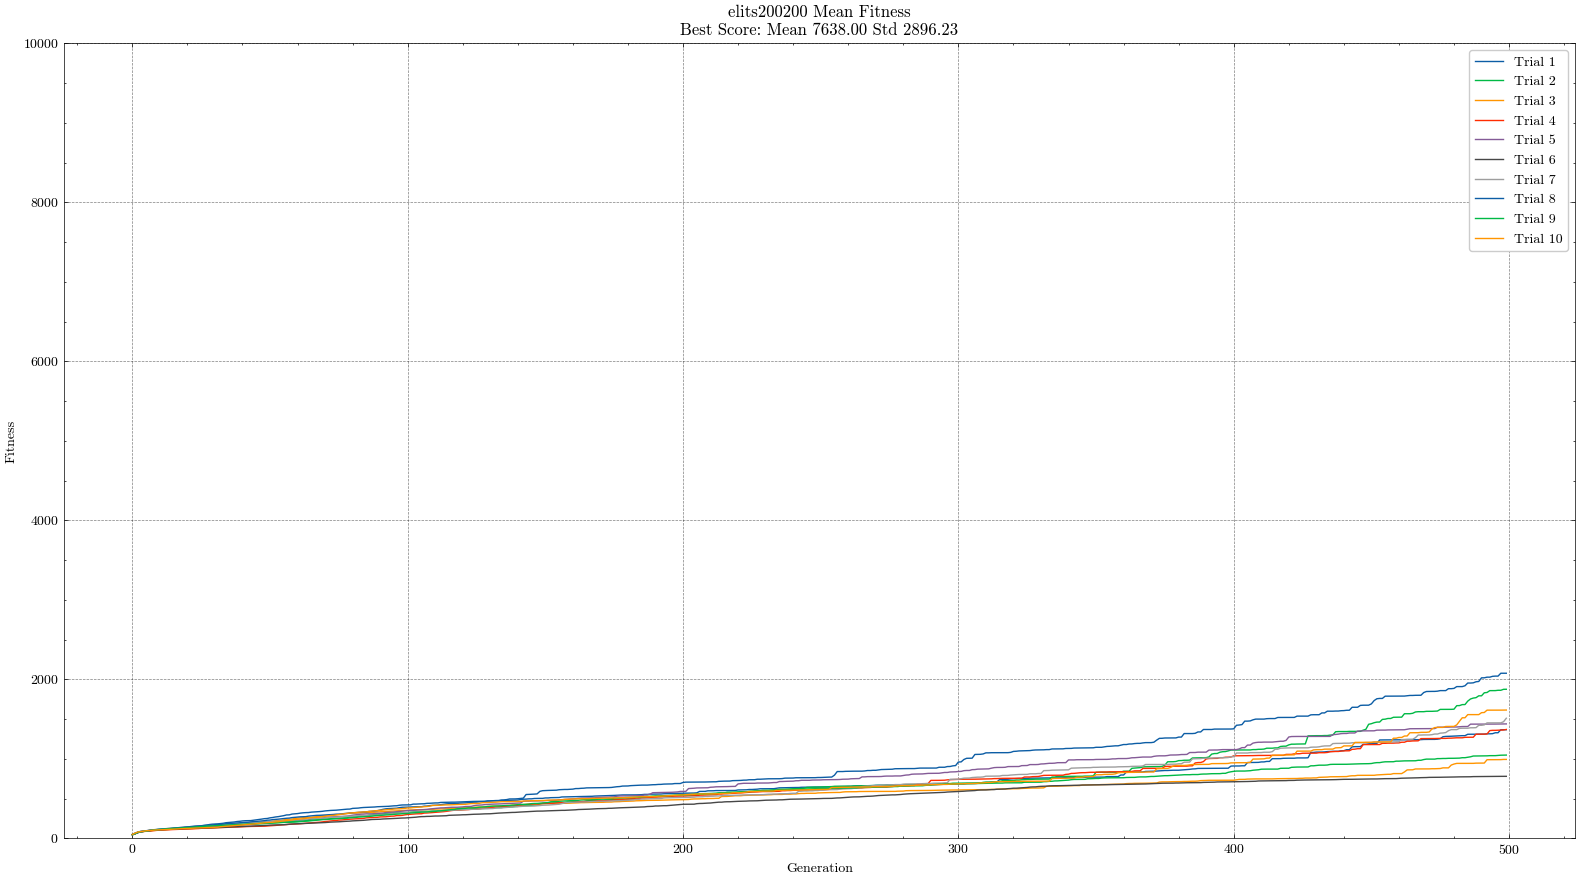

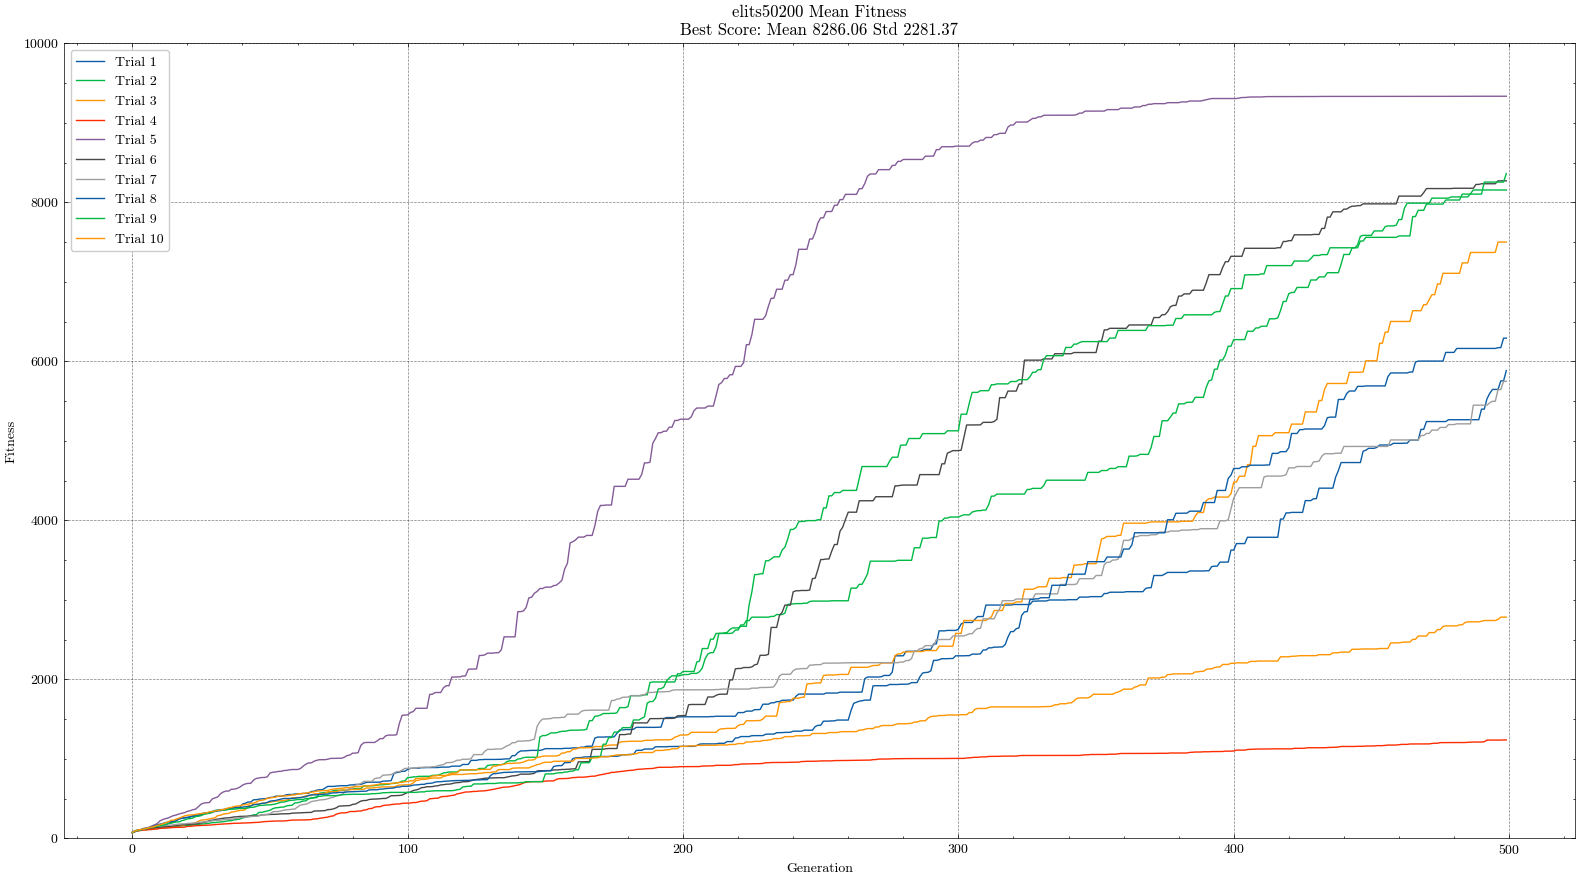

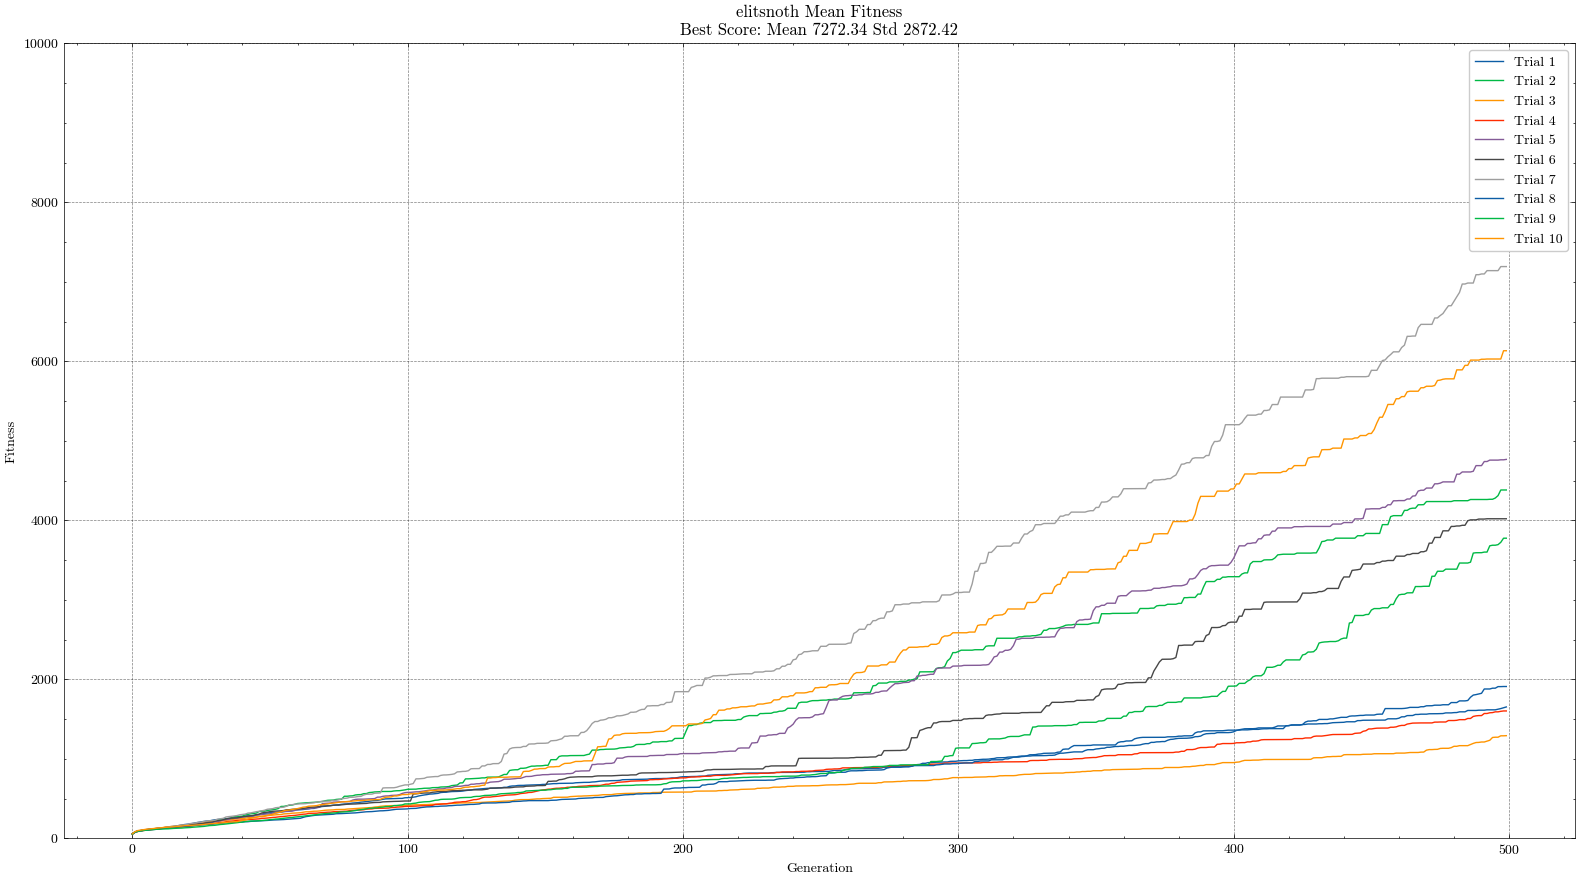

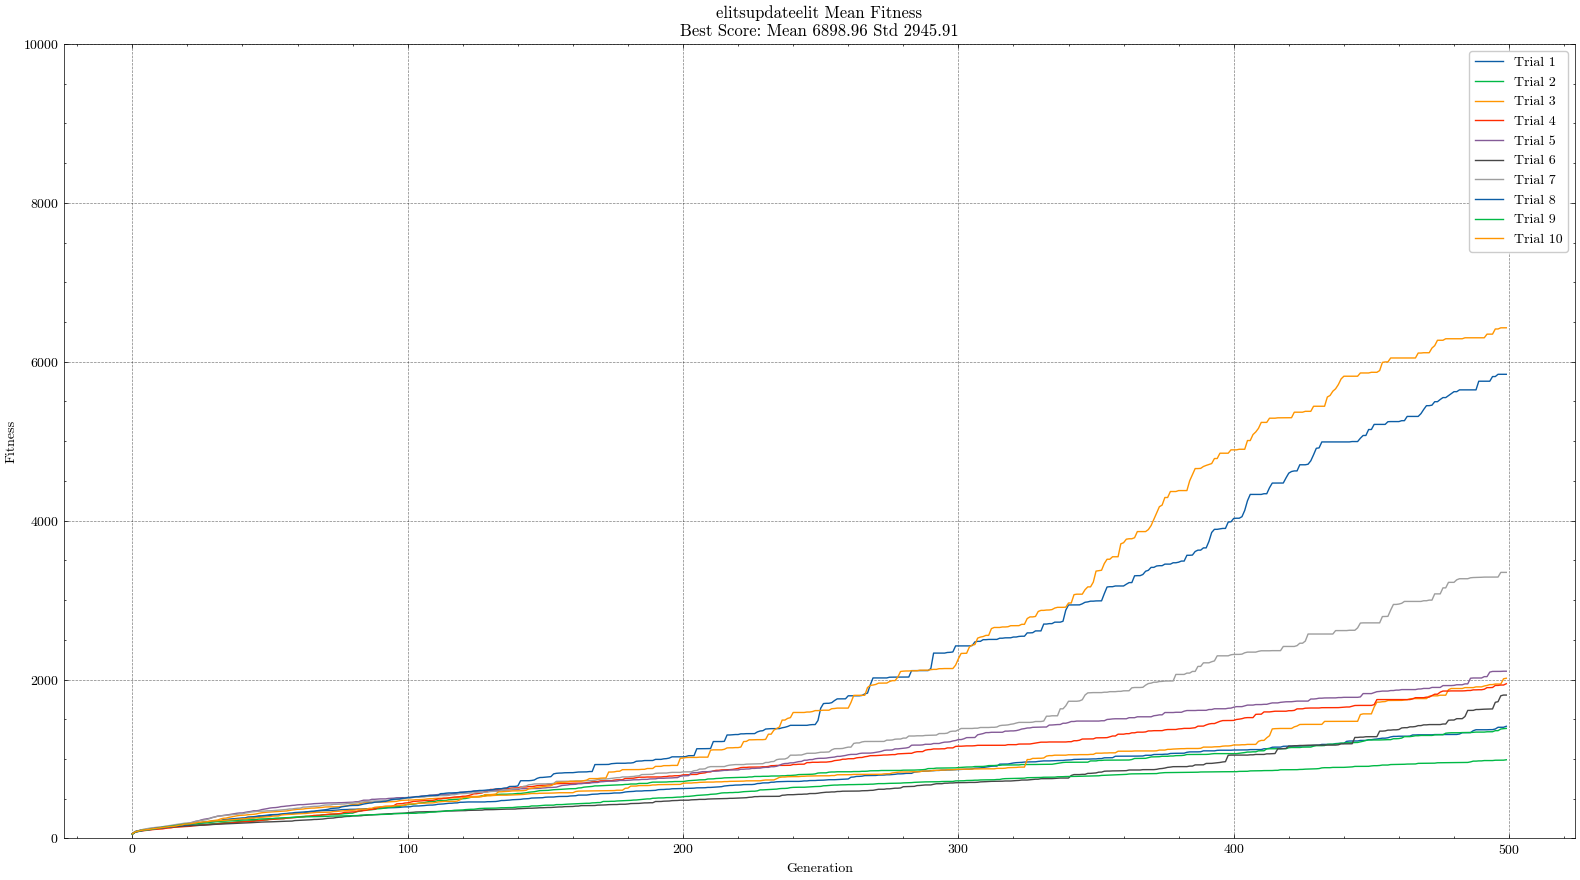

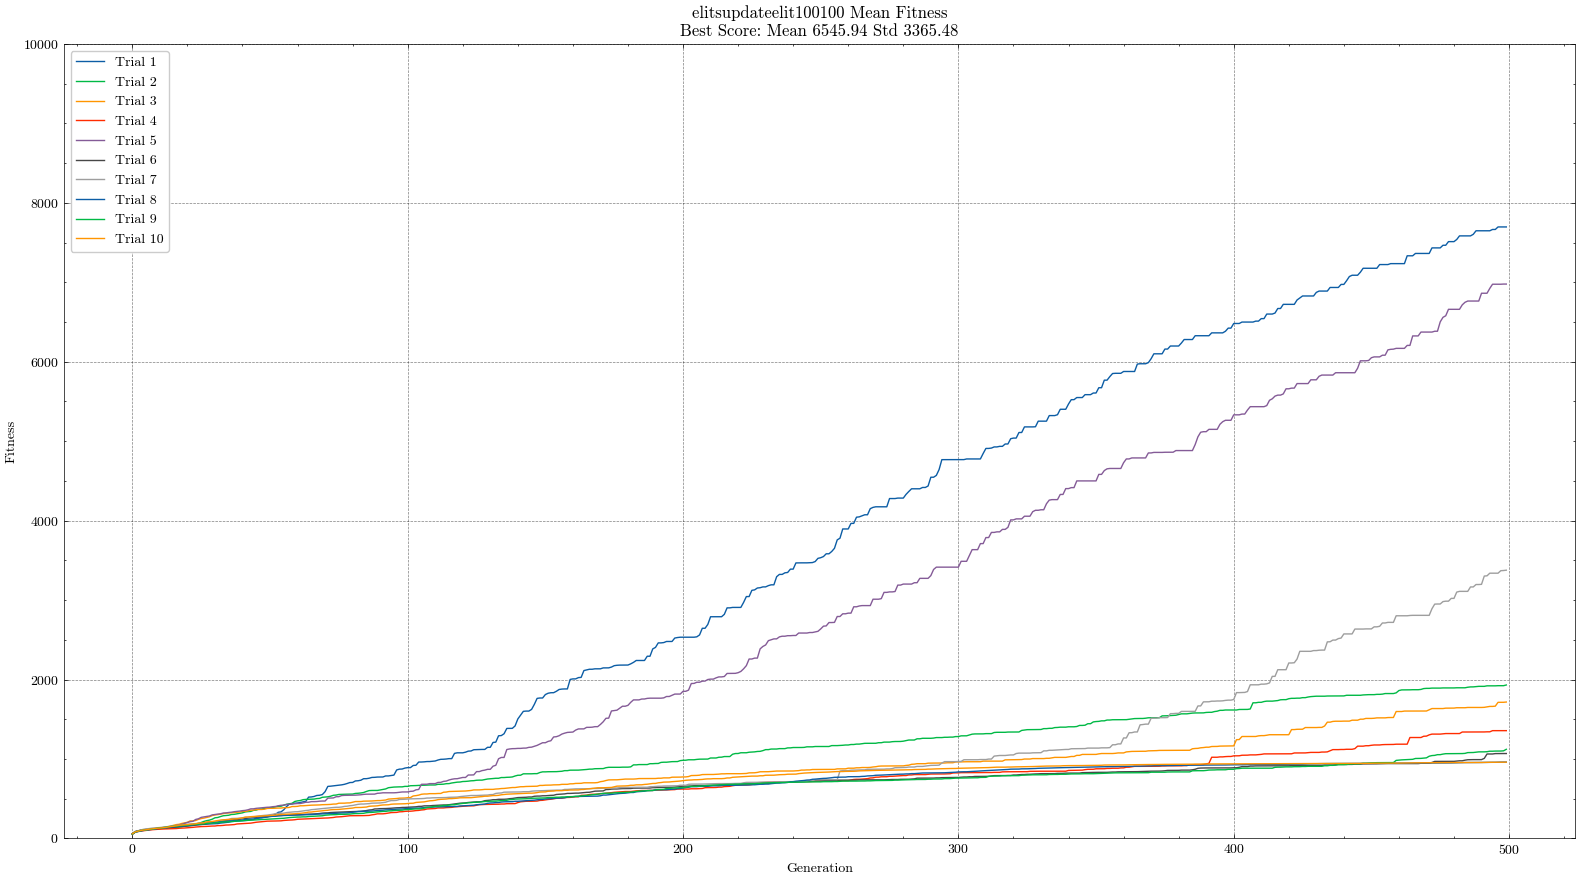

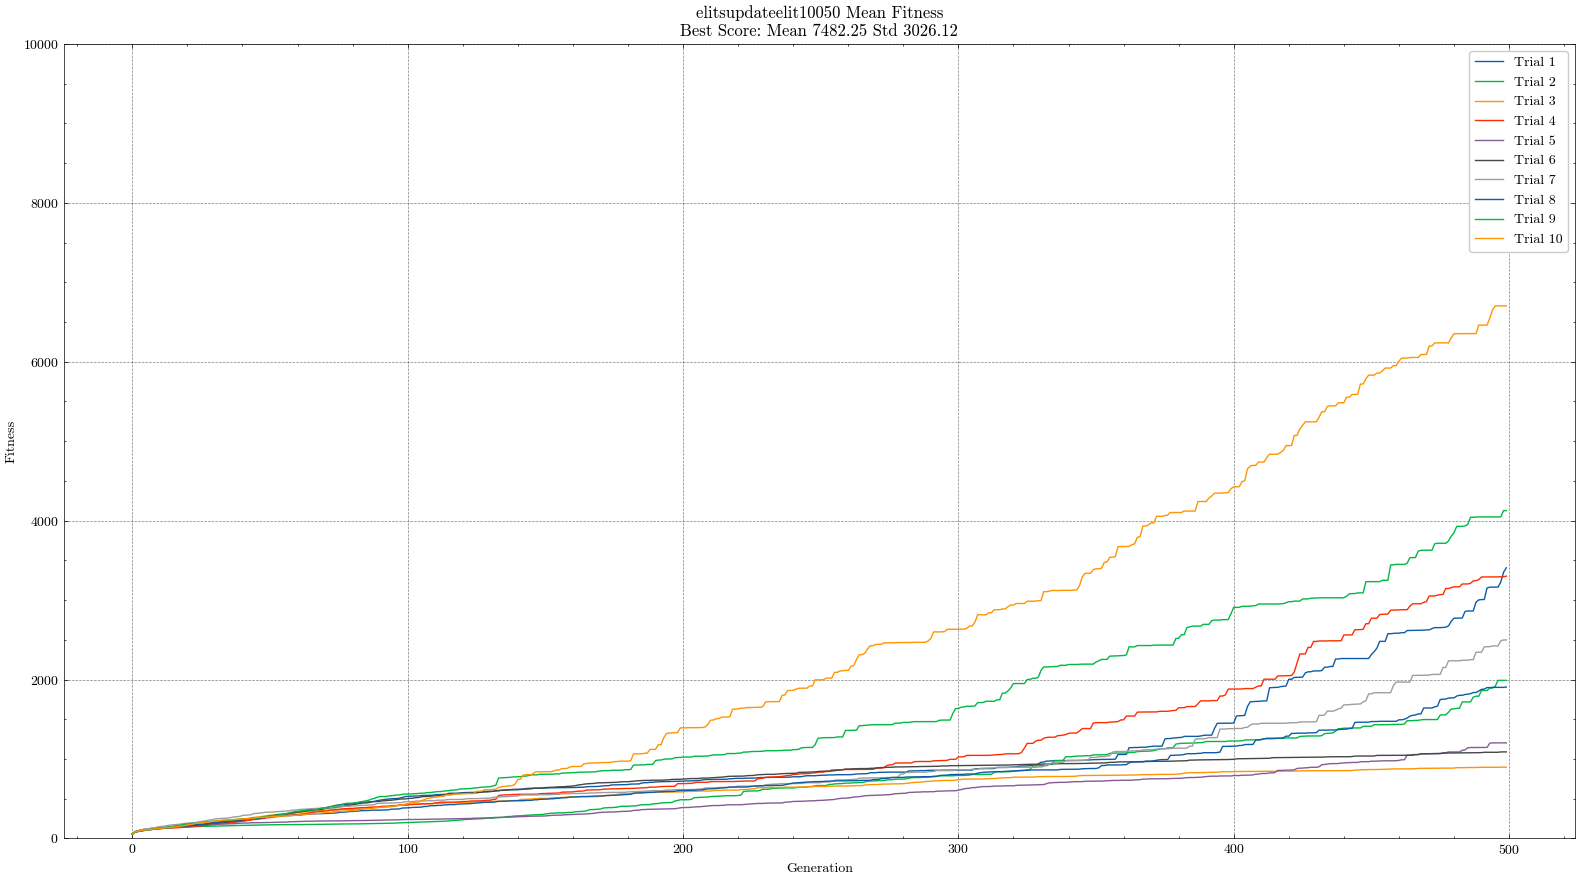

In [8]:
num_trials = 10

for exp_name in exp_name_uniques:
    # if os.path.exists(os.path.join(EXP_DIR, f"{exp_name}_archive_mean_fitness.png")):
    #     continue
    exp_traials = [data_dir for data_dir in data_dirs if data_dir.split("_")[0]==exp_name]
    exp_traials.sort()

    num_row = int(np.ceil(num_trials/3))
    plt.style.use(['science', 'grid', 'no-latex'])
    fig = plt.figure(figsize=(16, 9))
    best_score = []
    for i, exp_trial in enumerate(exp_traials[:num_trials]):
        df_history_fit = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_fitness_archive.csv"))
        df_history_best = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_fitness_archive.csv"))
        mean_fit, std_fit  = get_mean_std(df_history_fit, "fitness")
        best_score.append(df_history_best["fitness"].max())

        plt.plot(mean_fit, label=f"Trial {i+1}")

    mean_best_score = np.mean(best_score)
    std_best_score = np.std(best_score)
    plt.title(f"{exp_name} Mean Fitness\nBest Score: Mean {mean_best_score:.2f} Std {std_best_score:.2f}")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.ylim(0, 10000)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(EXP_DIR, f"{exp_name}_archive_mean_fitness.png"))
    plt.show()
    plt.close()

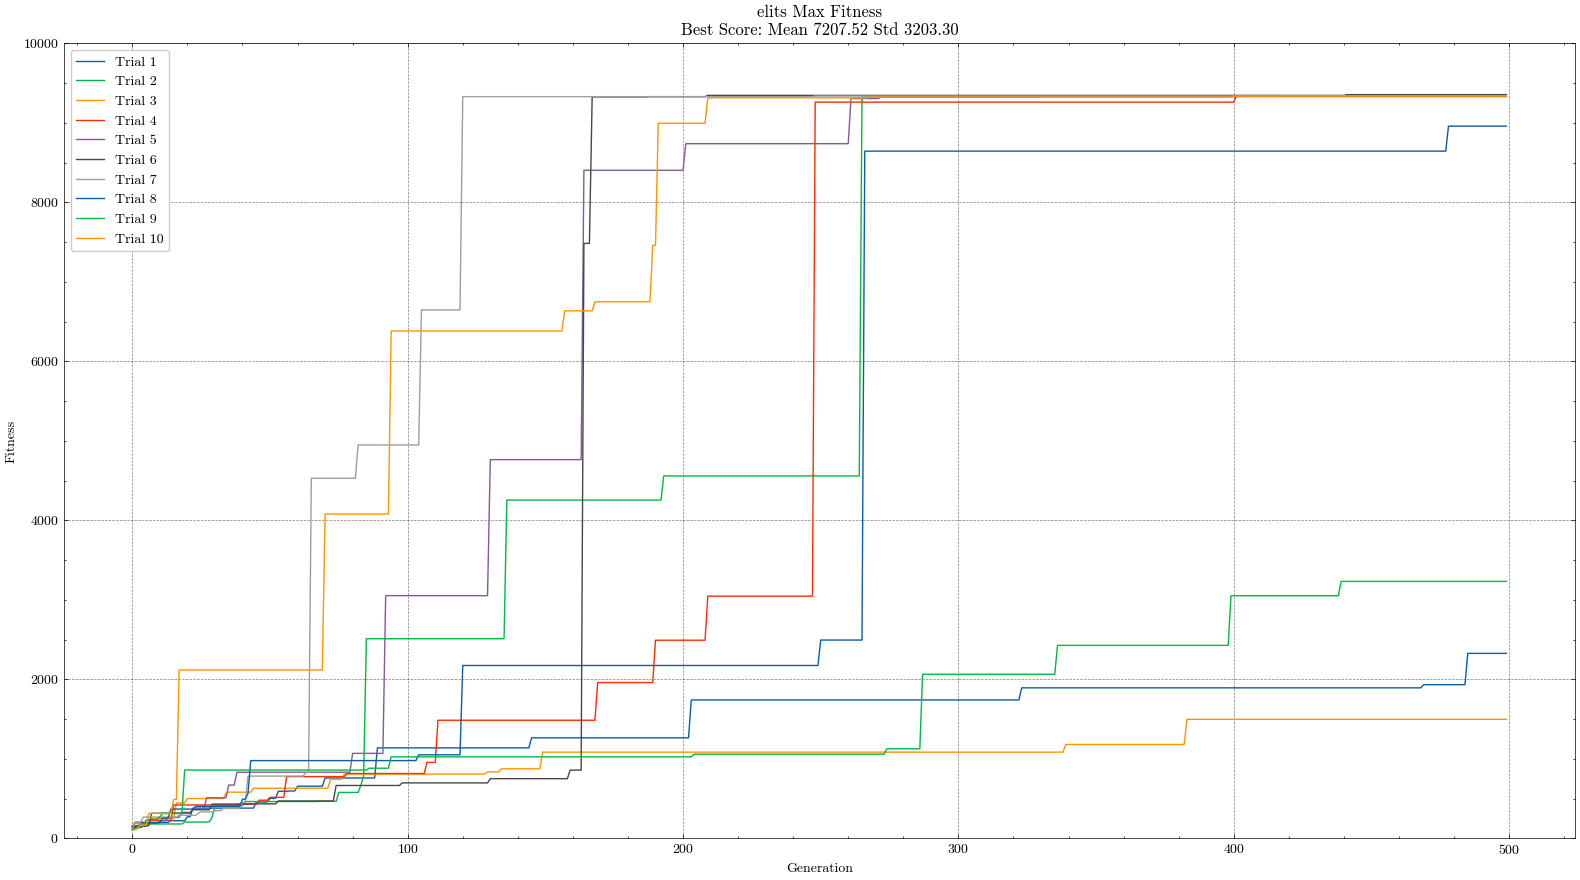

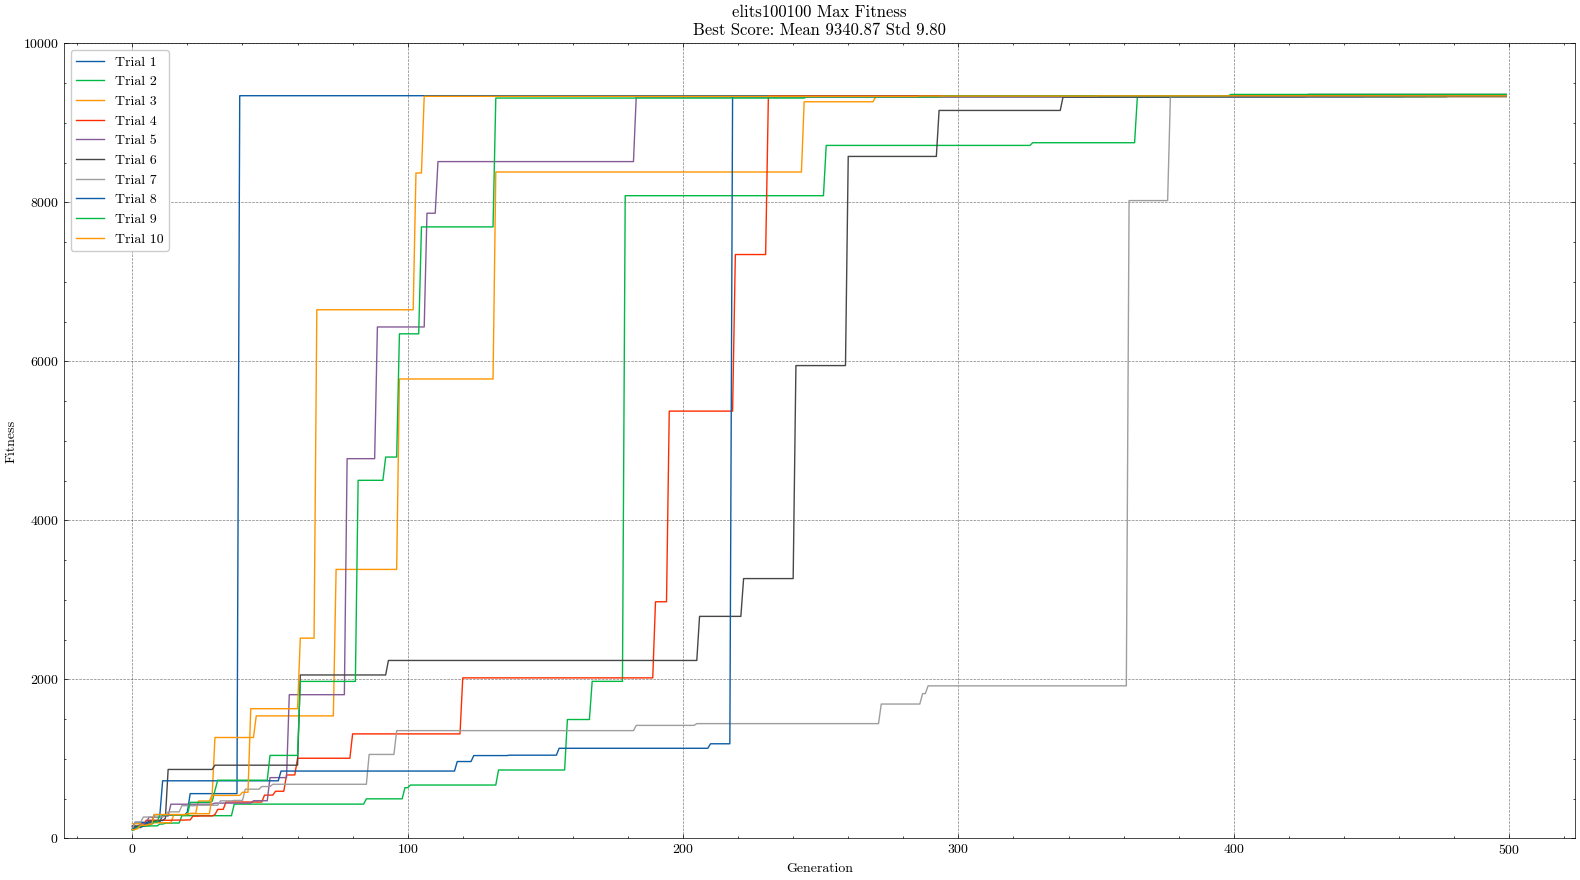

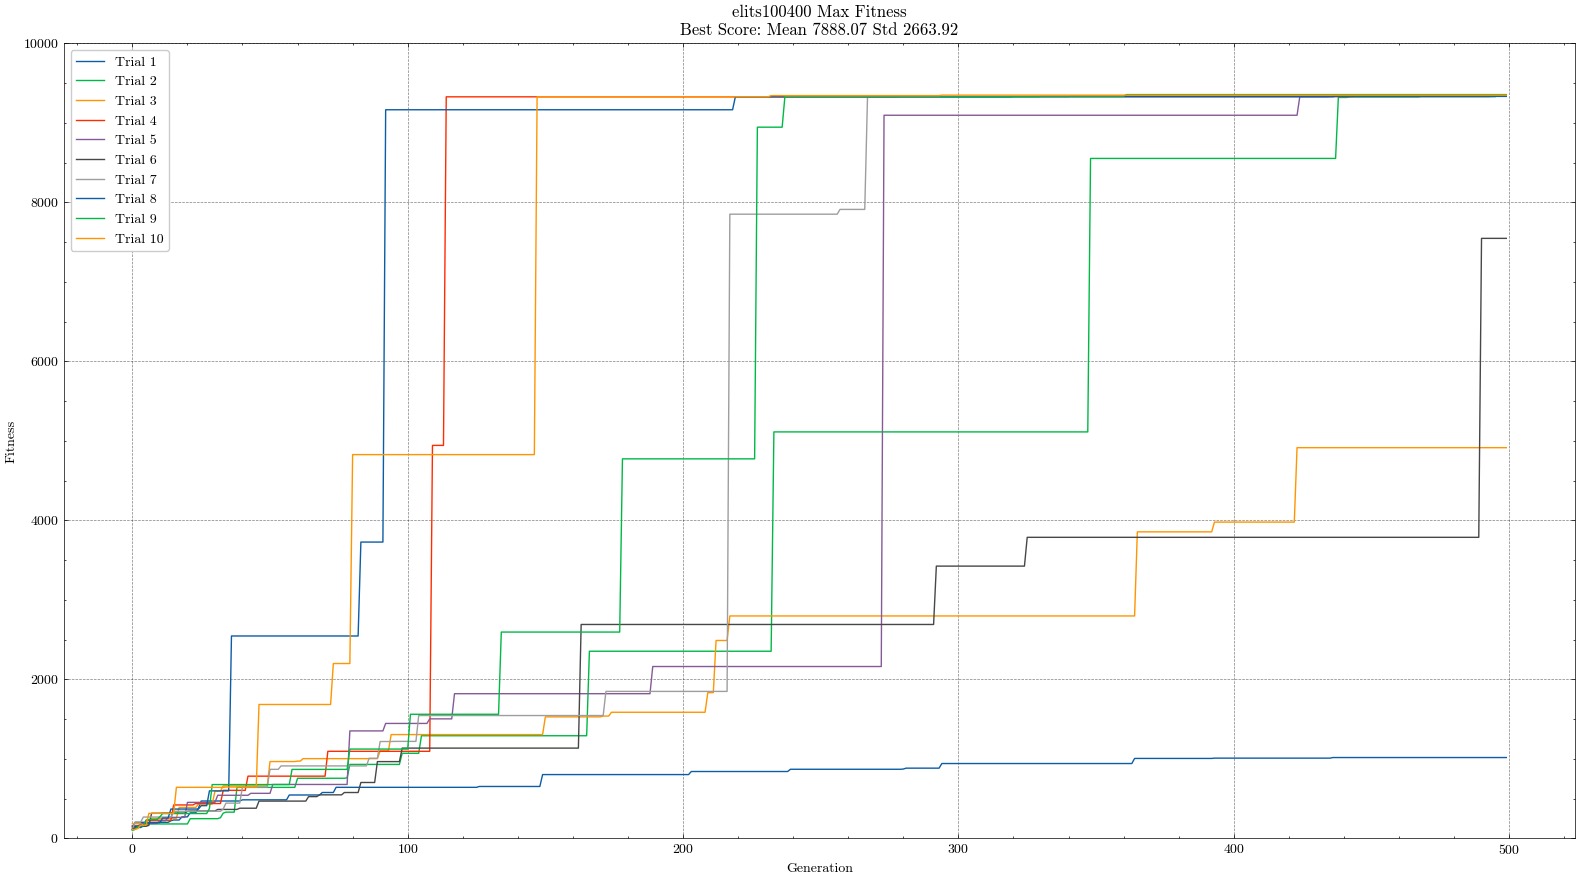

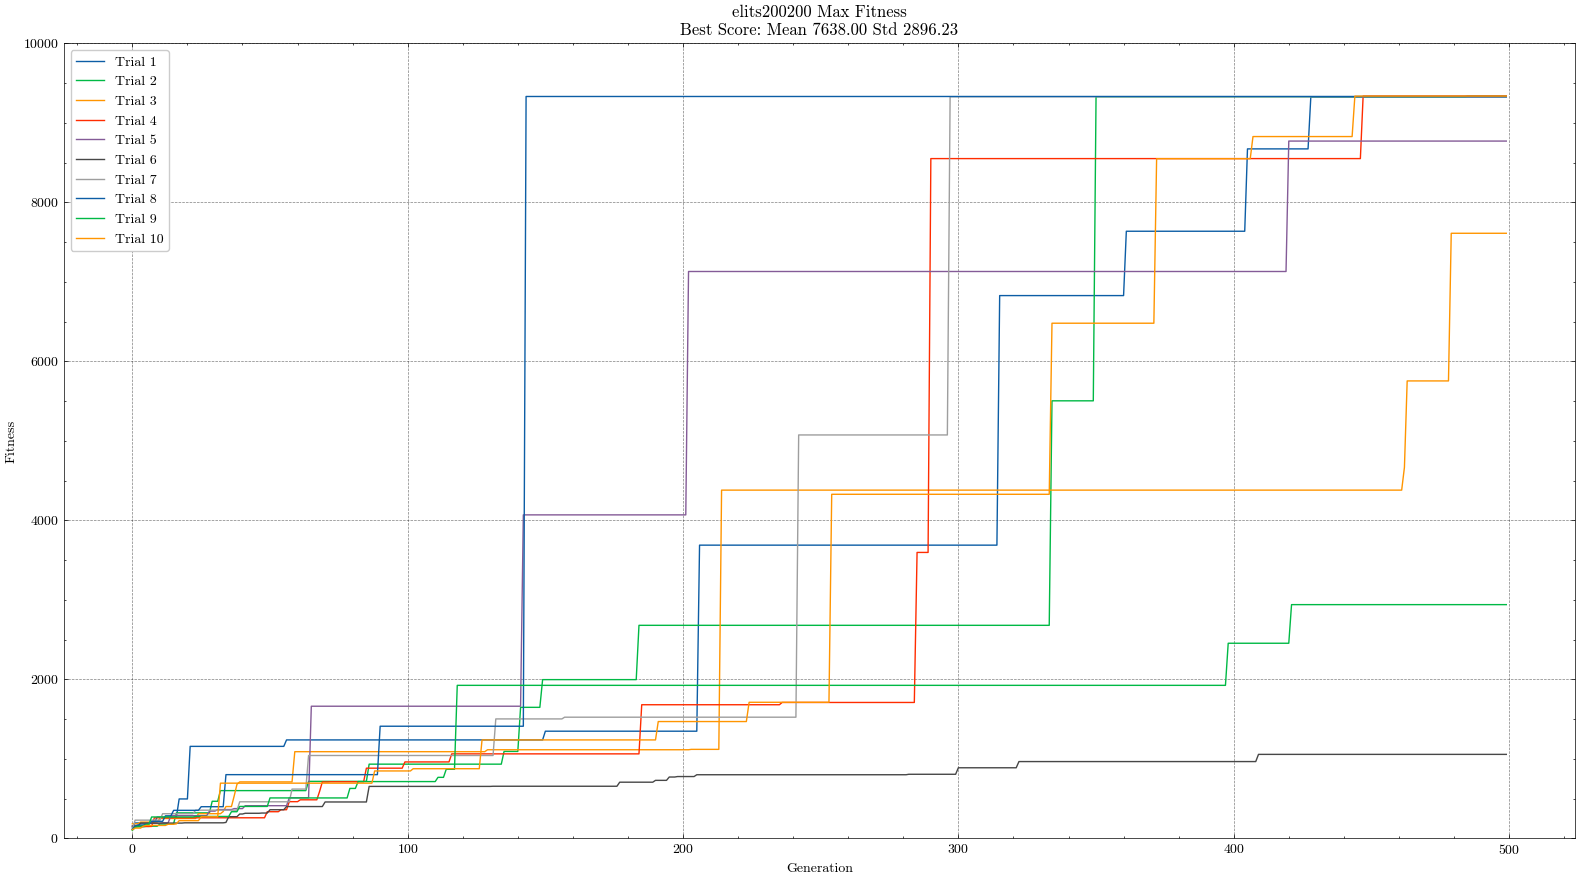

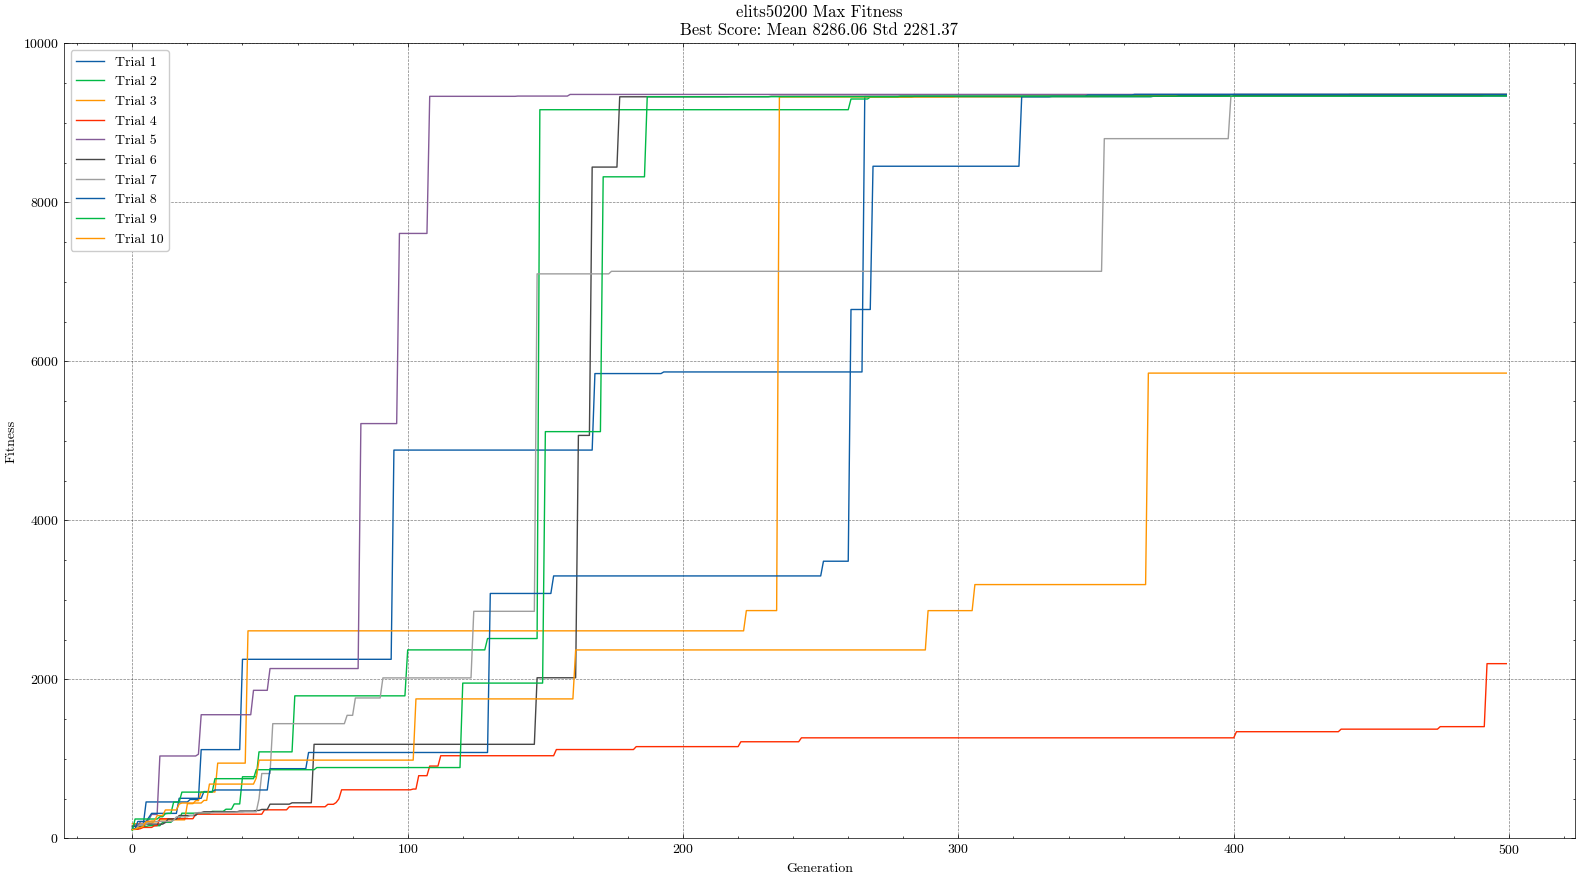

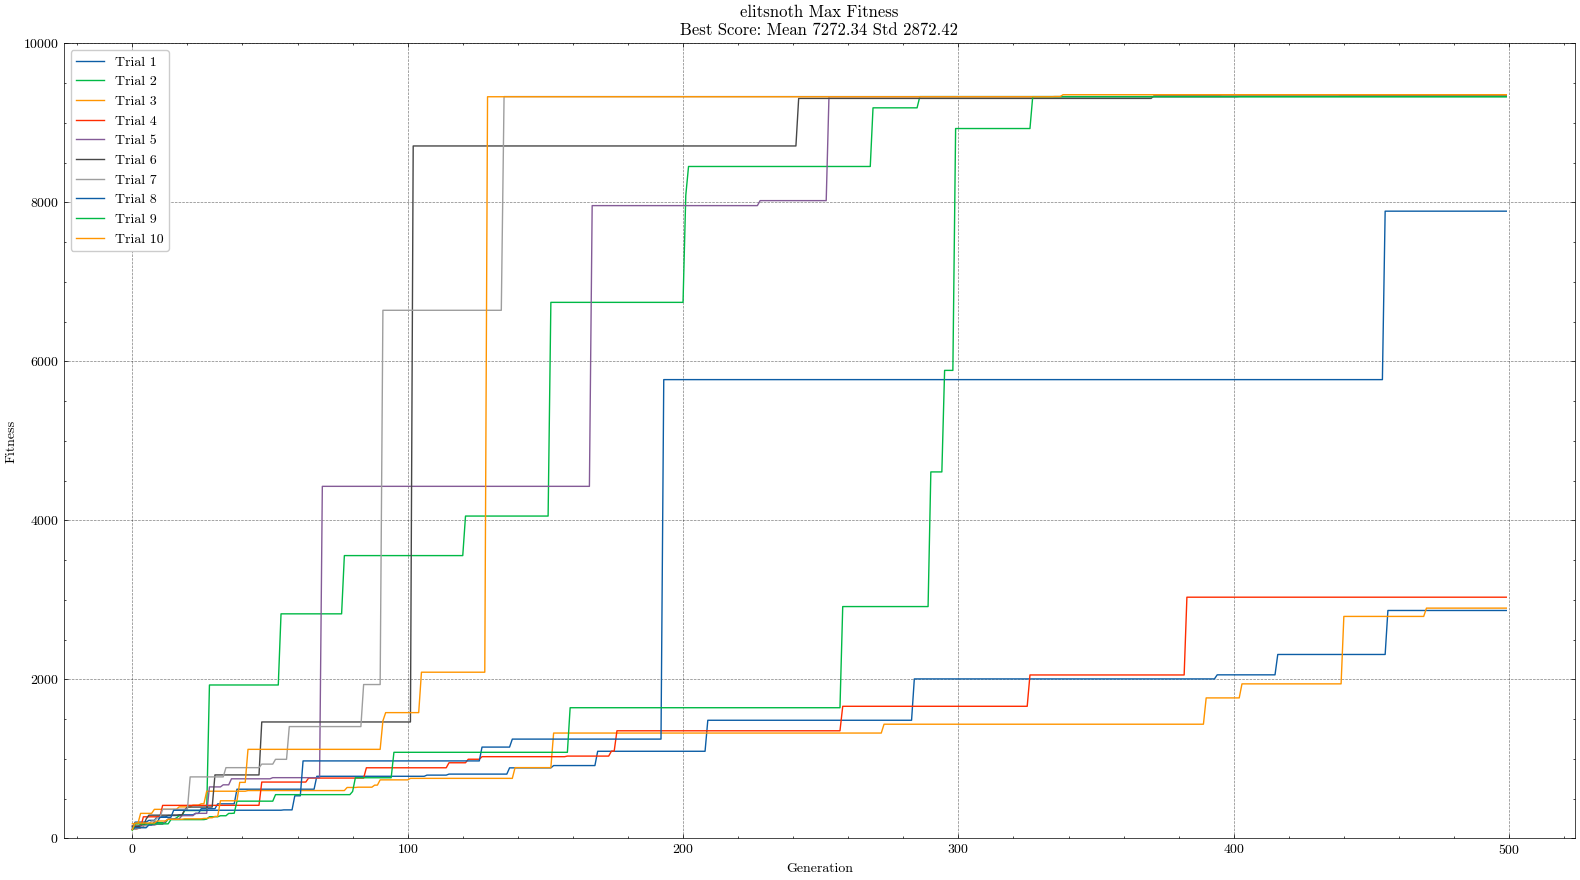

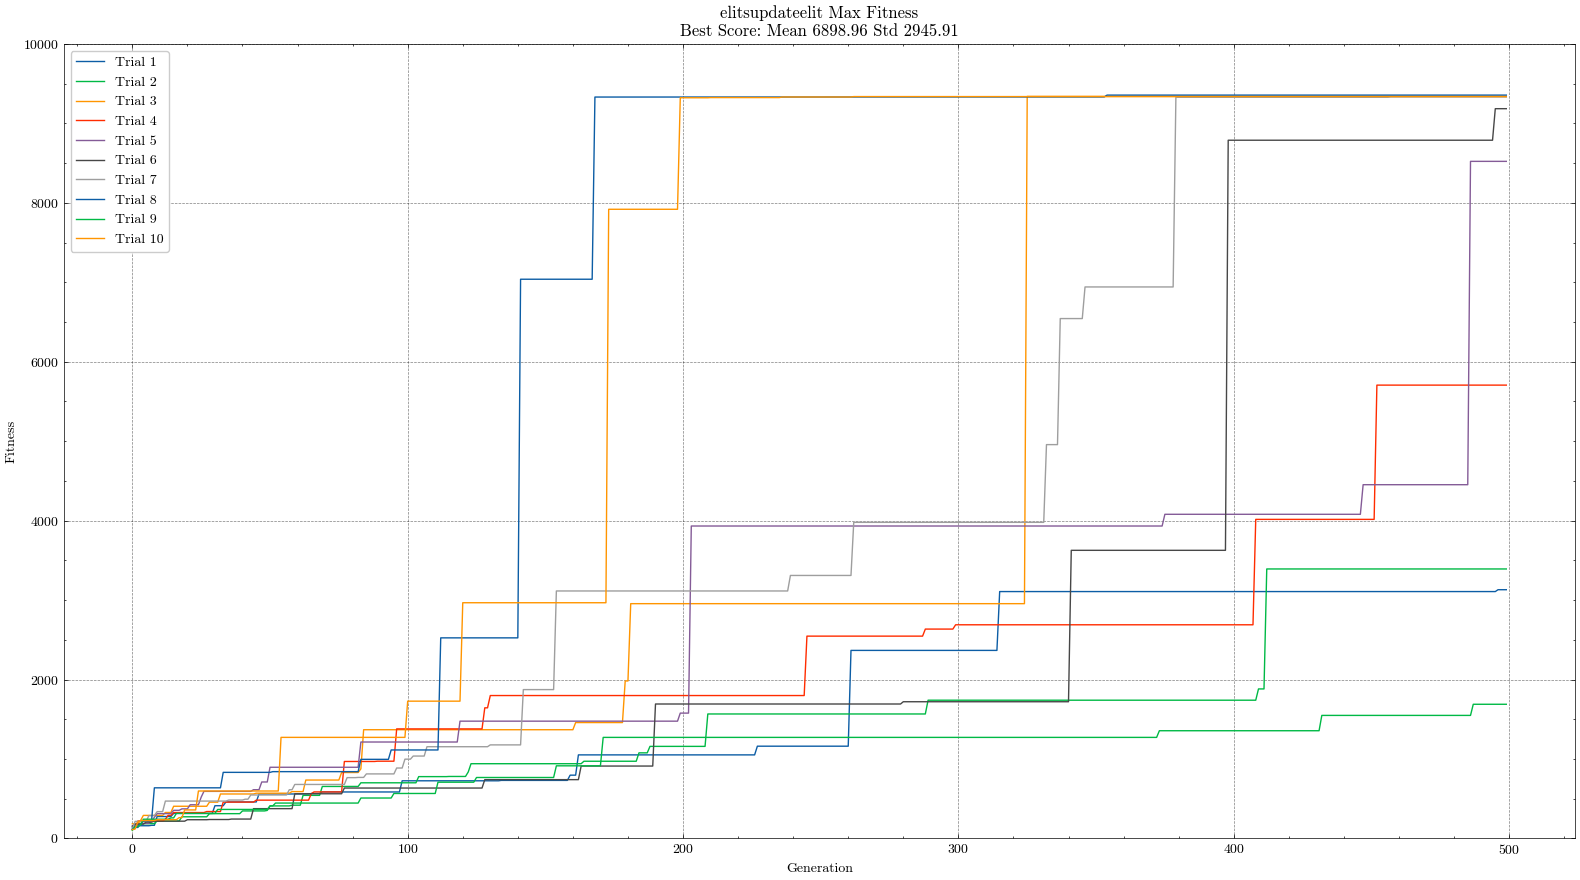

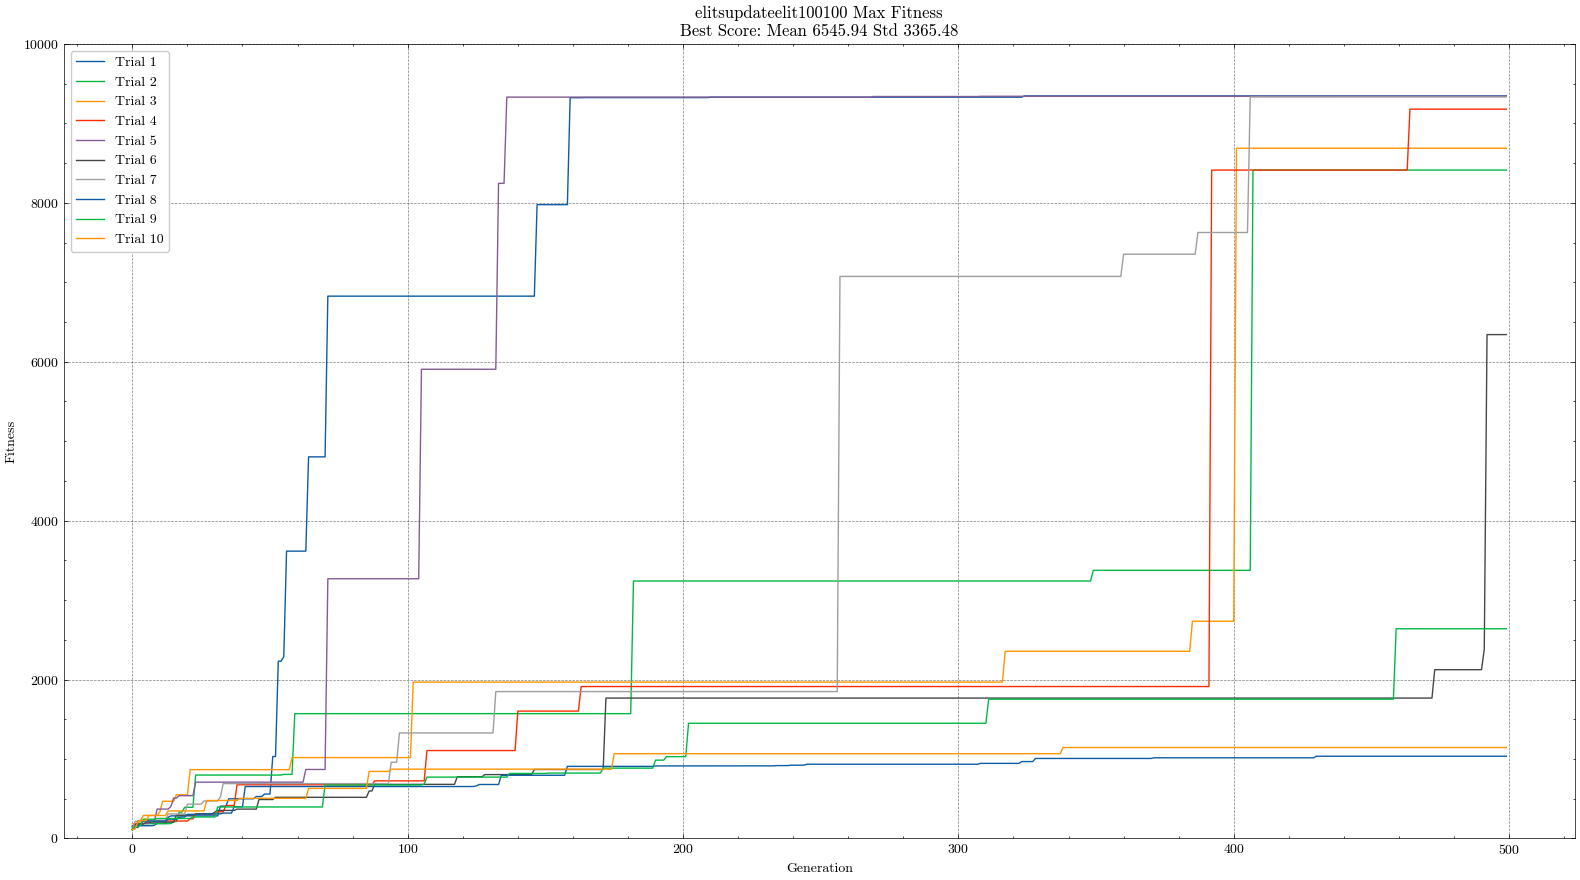

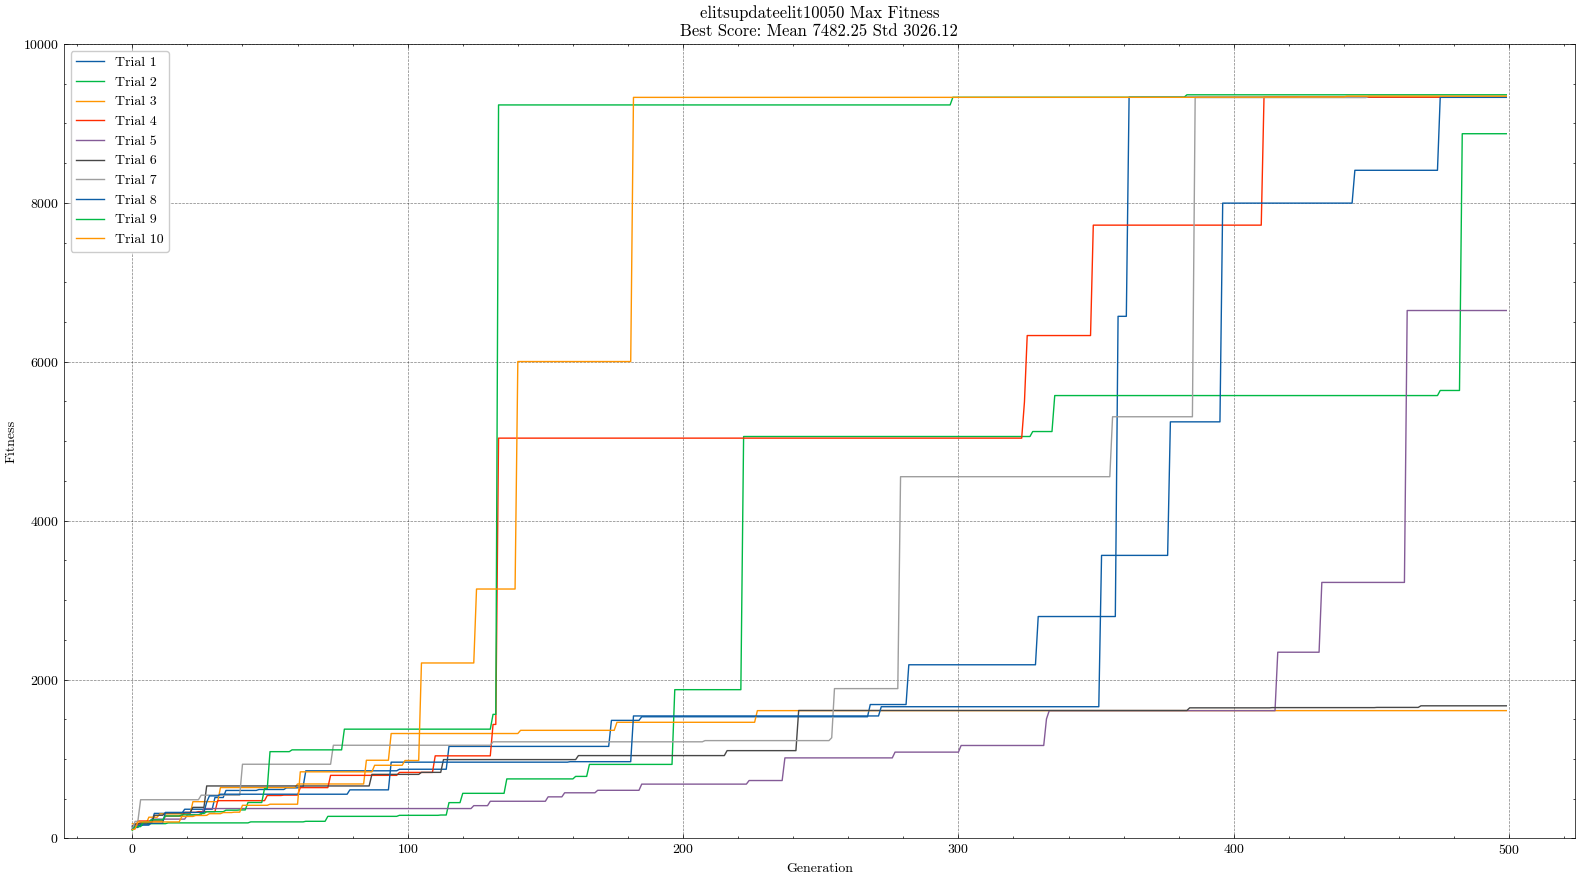

In [9]:
num_trials = 10

for exp_name in exp_name_uniques:
    # if os.path.exists(os.path.join(EXP_DIR, f"{exp_name}_archive_mean_fitness.png")):
    #     continue
    exp_traials = [data_dir for data_dir in data_dirs if data_dir.split("_")[0]==exp_name]
    exp_traials.sort()

    num_row = int(np.ceil(num_trials/3))
    plt.style.use(['science', 'grid', 'no-latex'])
    fig = plt.figure(figsize=(16, 9))
    best_score = []
    for i, exp_trial in enumerate(exp_traials[:num_trials]):
        df_history_fit = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_fitness_archive.csv"))
        df_history_best = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_fitness_archive.csv"))
        max_fit, min_fit  = get_max_min(df_history_fit, "fitness")
        best_score.append(df_history_best["fitness"].max())

        plt.plot(max_fit, label=f"Trial {i+1}")

    mean_best_score = np.mean(best_score)
    std_best_score = np.std(best_score)
    plt.title(f"{exp_name} Max Fitness\nBest Score: Mean {mean_best_score:.2f} Std {std_best_score:.2f}")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.ylim(0, 10000)
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(os.path.join(EXP_DIR, f"{exp_name}_archive_max_fitness.png"))
    plt.show()
    plt.close()

100


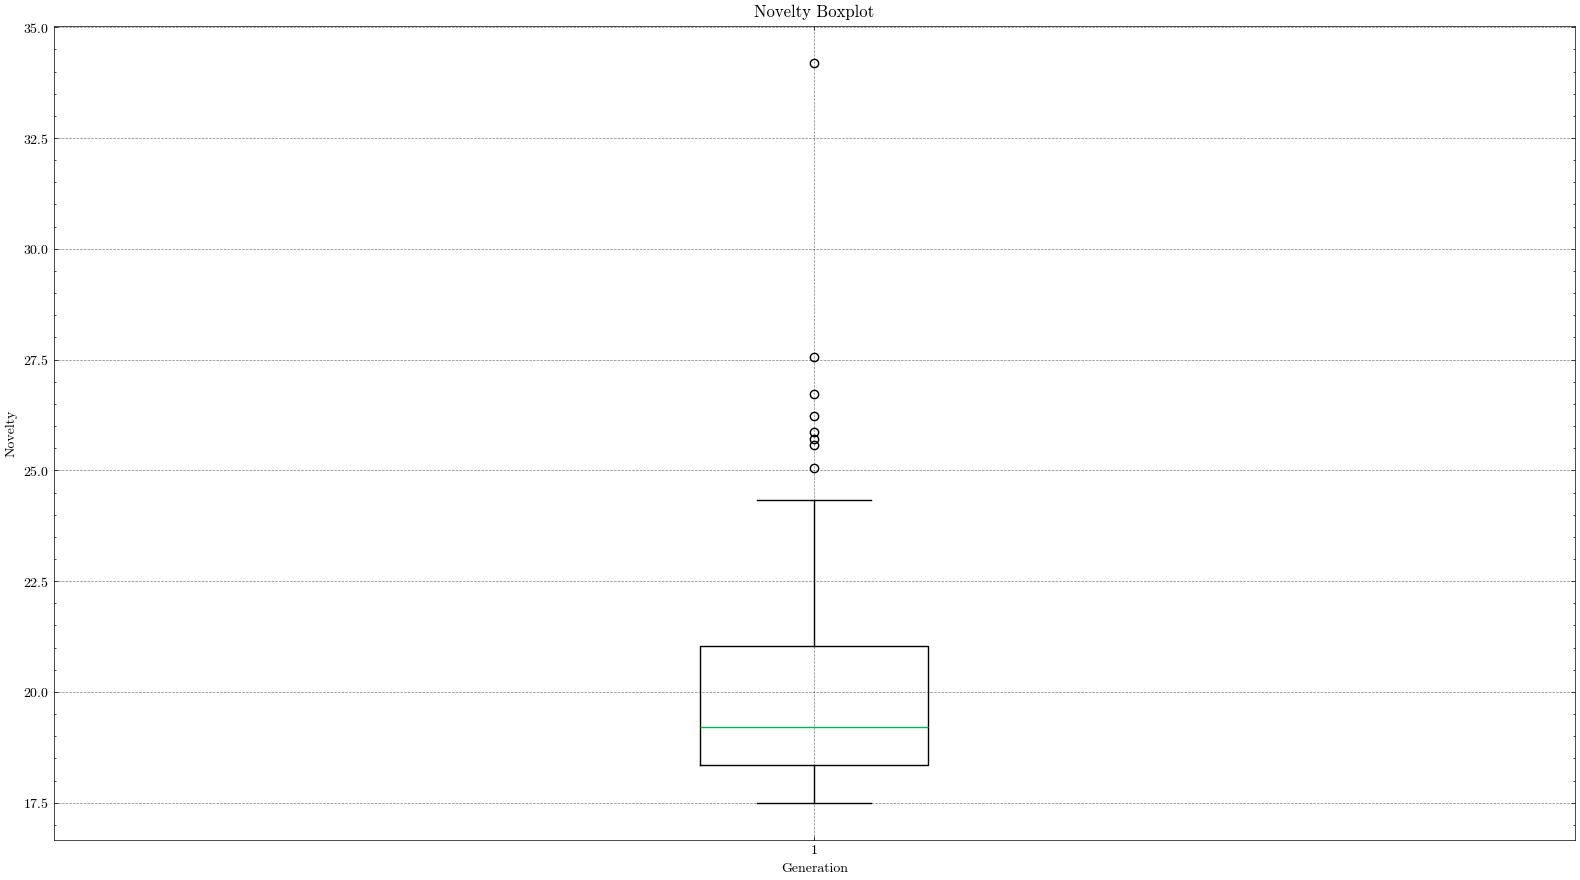

In [10]:
exp_trial = "elits100100_0"
df = pd.read_csv(os.path.join(EXP_DIR, exp_trial, "history_novelty_archive.csv")).query("generation==499")
print(len(df))

# noveltyの箱ひげ図
plt.style.use(['science', 'grid', 'no-latex'])
fig = plt.figure(figsize=(16, 9))
plt.boxplot(df["novelty"].values)
plt.title("Novelty Boxplot")
plt.xlabel("Generation")
plt.ylabel("Novelty")
plt.tight_layout()
plt.show()